# Business Analytics Project - 2022
# Automobile Loan Default Dataset
## Mohammad Zarei & Masoumeh Mahmoodi
## Sharif University of Technology

In [1]:
# installing Packages

# install.packages('dplyr')
# install.packages('Hmisc')
# install.packages('naniar')
# install.packages('mice')
# install.packages('ggplot2')
# install.packages('caTools')
# install.packages('caret')
# install.packages('rpart')
# install.packages('rpart.plot')
# install.packages('e1071')
# install.packages('ROCR')
# install.packages('randomForest')
# install.packages('gains')

## 1. Data

In [2]:
# Turning off the warnings
options(warn=-1)

# Changing the default size of the plots we are going to draw
# options(repr.plot.width=15, repr.plot.height=8)

# Importing required libraries
library(dplyr)
library(Hmisc)
library(naniar)
library(mice)
library(ggplot2)
library(caTools)
library(caret)
library(rpart)
library(rpart.plot)
library(e1071)
library(ROCR)
library(randomForest)
library(gains)


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Loading required package: lattice

Loading required package: survival

Loading required package: Formula

Loading required package: ggplot2


Attaching package: 'Hmisc'


The following objects are masked from 'package:dplyr':

    src, summarize


The following objects are masked from 'package:base':

    format.pval, units



Attaching package: 'mice'


The following object is masked from 'package:stats':

    filter


The following objects are masked from 'package:base':

    cbind, rbind



Attaching package: 'caret'


The following object is masked from 'package:survival':

    cluster



Attaching package: 'e1071'


The following object is masked from 'package:Hmisc':

    impute


randomForest 4.7-1.1

Type rfNews() to see new features/changes/bug fixes.


Attaching package: 'random

In [3]:
# Loading Dataset
df <- read.csv('Train_Dataset.csv', na.strings = '')
str(df)

'data.frame':	121856 obs. of  40 variables:
 $ ID                        : int  12142509 12138936 12181264 12188929 12133385 12191614 12128086 12215264 12159147 12130547 ...
 $ Client_Income             : chr  "6750" "20250" "18000" "15750" ...
 $ Car_Owned                 : int  0 1 0 0 1 0 1 0 1 0 ...
 $ Bike_Owned                : int  0 0 0 0 0 1 1 0 1 0 ...
 $ Active_Loan               : int  1 1 1 1 1 1 0 1 0 0 ...
 $ House_Own                 : int  0 NA 0 1 0 1 1 1 1 1 ...
 $ Child_Count               : chr  "0" "0" "1" "0" ...
 $ Credit_Amount             : chr  "61190.55" "15282" "59527.35" "53870.4" ...
 $ Loan_Annuity              : chr  "3416.85" "1826.55" "2788.2" "2295.45" ...
 $ Accompany_Client          : chr  "Alone" "Alone" "Alone" "Alone" ...
 $ Client_Income_Type        : chr  "Commercial" "Service" "Service" "Retired" ...
 $ Client_Education          : chr  "Secondary" "Graduation" "Graduation dropout" "Secondary" ...
 $ Client_Marital_Status     : chr  "M" "M" "W

## 2. Exploratory Data Analysis (EDA)

### 2.1 Descriptive Statistics

In [4]:
# Specifying Numerical Variables
cols <- c(2, 7:9, 17:21, 30, 36)
df[cols] <- lapply(df[cols], as.numeric)

# Descriptive Statistics
describe(df)

df 

 40  Variables      121856  Observations
--------------------------------------------------------------------------------
ID 
       n  missing distinct     Info     Mean      Gmd      .05      .10 
  121856        0   121856        1 12160929    40619 12106094 12112187 
     .25      .50      .75      .90      .95 
12130465 12160929 12191392 12209671 12215763 

lowest : 12100001 12100002 12100003 12100004 12100005
highest: 12221852 12221853 12221854 12221855 12221856
--------------------------------------------------------------------------------
Client_Income 
       n  missing distinct     Info     Mean      Gmd      .05      .10 
  118234     3622     1216    0.995    16865     9300     6750     8100 
     .25      .50      .75      .90      .95 
   11250    14400    20250    27000    33750 

lowest :    2565    2610    2646    2700    2790
highest:  382500  395006  450000  675000 1800009

0 (24572, 0.208), 20000 (84854, 0.718), 40000 (7755, 0.066), 60000 (754,
0.006), 80000 (

### 2.2 Univariate Analysis

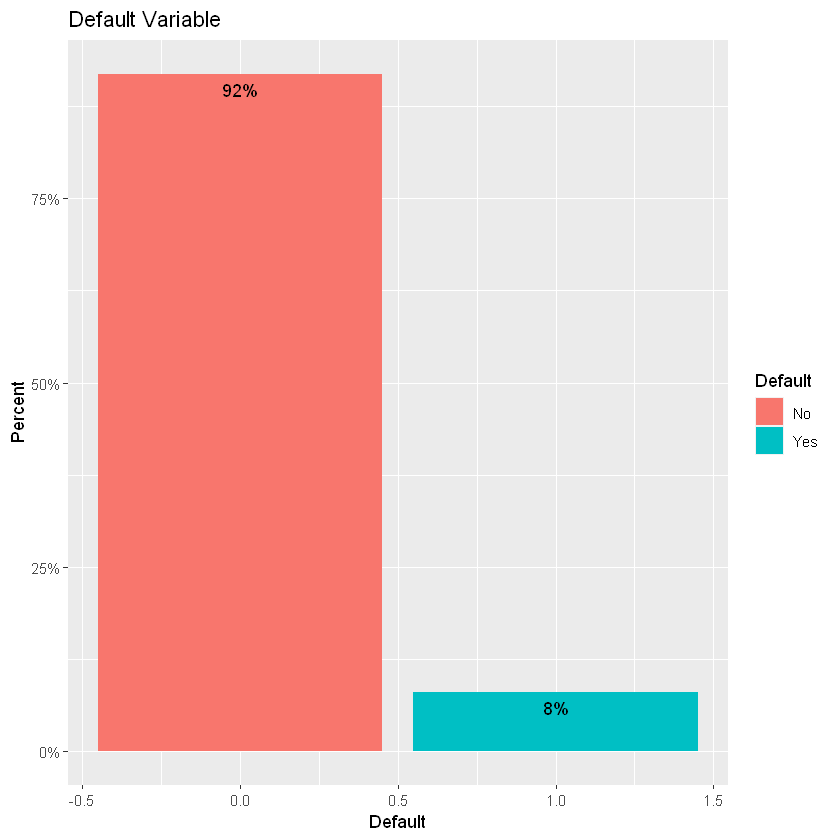

In [5]:
# Default Variable
# Bar chart
ggplot(df, aes(x= Default)) + 
  geom_bar(aes(y = ..prop.., fill = factor(..x..)), stat="count") +
  geom_text(aes( label = scales::percent(..prop..),
                 y= ..prop.. ), stat= "count", vjust = 1.6) +
  labs(y = "Percent", fill="Default") +
  scale_y_continuous(labels = scales::percent) + 
  scale_fill_discrete( labels = c('No', 'Yes')) +
  ggtitle("Default Variable")


## 3. Data Preprocessing

### 3.1 Outliers

In [6]:
# Outlier Function
outliers <- function(var) {
  boxplot(var, plot = FALSE)$out
}

In [7]:
# Counting Outliers
nrow(subset(df, Client_Income %in% outliers(df$Client_Income)))
nrow(subset(df, Child_Count %in% outliers(df$Child_Count)))
nrow(subset(df, Credit_Amount %in% outliers(df$Credit_Amount)))
nrow(subset(df, Loan_Annuity %in% outliers(df$Loan_Annuity)))
nrow(subset(df, Employed_Days %in% outliers(df$Employed_Days)))
nrow(subset(df, Registration_Days %in% outliers(df$Registration_Days)))
nrow(subset(df, ID_Days %in% outliers(df$ID_Days)))
nrow(subset(df, Client_Family_Members %in% outliers(df$Client_Family_Members)))
nrow(subset(df, Score_Source_2 %in% outliers(df$Score_Source_2)))
nrow(subset(df, Credit_Bureau %in% outliers(df$Credit_Bureau)))


[1] 5392

[1] 1659

[1] 2567

[1] 2894

[1] 21488

[1] 234

[1] 0

[1] 1564

[1] 6

[1] 1303

### 3.2 Missing Values

In [8]:
# Rows without NAs
dim(na.omit(df))

[1] 2568   40

In [9]:
# Summary of Missing Values
miss_var_summary(df)

variable,n_miss,pct_miss
<chr>,<int>,<dbl>
Own_House_Age,80095,65.729221
Score_Source_1,68835,56.488806
Social_Circle_Default,61928,50.820641
Client_Occupation,41435,34.003250
Score_Source_3,26922,22.093290
Credit_Bureau,18540,15.214680
ID_Days,5985,4.911535
Score_Source_2,5686,4.666163
Population_Region_Relative,4868,3.994879


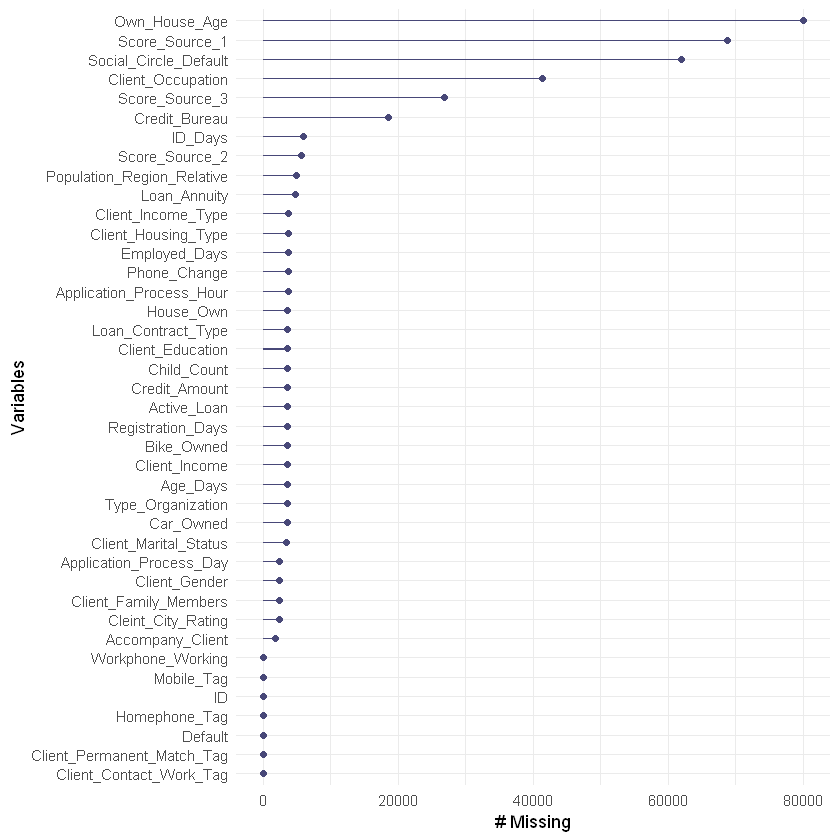

In [10]:
# Missing Values
gg_miss_var(df)

In [11]:
# Preprocessing Function
dataset_prep <- function(dataset1, omit = F) {
  # Specifying Numerical Variables
  # cols <- c(2, 7:9, 17:21, 30, 36)
  # dataset[cols] <- lapply(dataset[cols], as.numeric)
  
  dataset <- dataset1
  
  dataset$Employed_Days[dataset$Employed_Days %in% outliers(dataset$Employed_Days)] <- NA

  temp <- c('Businessman', 'Maternity leave', 'Student', 'Unemployed')
  dataset$Client_Income_Type[dataset$Client_Income_Type %in% temp] <- 'Other'

  temp <- c('Business Entity Type 1', 'Business Entity Type 2', 'Business Entity Type 3')
  dataset$Type_Organization[dataset$Type_Organization %in% temp] <- 'Business Entity'
  temp <- c('Industry: type 1', 'Industry: type 2', 'Industry: type 3', 'Industry: type 4',
            'Industry: type 5', 'Industry: type 6', 'Industry: type 7', 'Industry: type 8',
            'Industry: type 9', 'Industry: type 10', 'Industry: type 11',
            'Industry: type 12', 'Industry: type 13')
  dataset$Type_Organization[dataset$Type_Organization %in% temp] <- 'Industry'
  temp <- c('Trade: type 1', 'Trade: type 2', 'Trade: type 3', 'Trade: type 4',
            'Trade: type 5', 'Trade: type 6', 'Trade: type 7')
  dataset$Type_Organization[dataset$Type_Organization %in% temp] <- 'Trade'
  temp <- c('Transport: type 1', 'Transport: type 2', 'Transport: type 3', 'Transport: type 4')
  dataset$Type_Organization[dataset$Type_Organization %in% temp] <- 'Transport'
  dataset$Type_Organization[is.na(dataset$Type_Organization)] <- 'XNA'

  if (omit == F) {
    dataset$Client_Income[dataset$Client_Income > 100000] = 100000
    dataset$Child_Count[dataset$Child_Count > 4] = 4
    dataset$Client_Family_Members[dataset$Client_Family_Members > 6] = 6
    dataset$Credit_Bureau[dataset$Credit_Bureau > 10] = 10
    dataset$Score_Source_2[dataset$Score_Source_2 %in% outliers(dataset$Score_Source_2)] <- NA
    dataset$Accompany_Client[dataset$Accompany_Client == '##'] <- NA
    dataset$Client_Gender[dataset$Client_Gender == 'XNA'] <- NA   
  } else {
    dataset <- subset(dataset, !(Client_Income %in% outliers(dataset$Client_Income)) | is.na(Client_Income))
    dataset <- subset(dataset, !(Child_Count %in% outliers(dataset$Child_Count)) | is.na(Child_Count))
    dataset <- subset(dataset, !(Credit_Amount %in% outliers(dataset$Credit_Amount)) | is.na(Credit_Amount))
    dataset <- subset(dataset, !(Loan_Annuity %in% outliers(dataset$Loan_Annuity)) | is.na(Loan_Annuity))
    dataset <- subset(dataset, !(Registration_Days %in% outliers(dataset$Registration_Days)) | is.na(Registration_Days))
    dataset <- subset(dataset, !(ID_Days %in% outliers(dataset$ID_Days)) | is.na(ID_Days))
    dataset <- subset(dataset, !(Client_Family_Members %in% outliers(dataset$Client_Family_Members)) | is.na(Client_Family_Members))
    dataset <- subset(dataset, !(Score_Source_2 %in% outliers(dataset$Score_Source_2)) | is.na(Score_Source_2))
    dataset <- subset(dataset, Accompany_Client != '##' | is.na(Accompany_Client))
    dataset <- subset(dataset, Client_Gender != 'XNA' | is.na(Client_Gender))
  }
  
  # Specifying Categorical Variables
  cols = c(3:7, 10:16, 23:29, 31:33, 39, 40 )
  dataset[cols] <- lapply(dataset[cols], factor)
  
  na_dim = dim(na.omit(dataset))
  print(paste("The Number of Complete rows is", na_dim[1]))
  dataset
}


In [12]:
df_norm <- dataset_prep(df)
df_omit <- dataset_prep(df, omit = T)

[1] "The Number of Complete rows is 2635"
[1] "The Number of Complete rows is 2142"


### 3.3 Imputaion

In [13]:
# Select Dataset to impute

# df <- df_norm

# df <- df_omit

In [14]:
# Warning: The Imputation Process will takes several minutes

# met <- c('pmm', 'logreg', 'logreg', 'logreg', 'logreg', 'pmm', 'pmm', 'pmm', 'polyreg',
#          'polyreg', 'polyreg', 'polyreg', 'logreg', 'logreg', 'polyreg', 'pmm', 'pmm',
#          'pmm', 'pmm', 'pmm', 'pmm', '', '', 'polyreg', 'pmm', 'pmm', 'pmm', 'pmm',
#          '', '', 'pmm', 'pmm', 'pmm', 'pmm', 'pmm', 'pmm')
# imputed_Data <- mice(df[, c(2:22, 24:32, 34:39)], m = 1, method = met, seed = 500)

In [15]:
# summary(imputed_Data)

In [16]:
# imputed_Data <- complete(imputed_Data)
# dim(na.omit(imputed_Data))

In [17]:
# describe(imputed_Data)

In [18]:
# df[, c(2:32, 34:39)] <- imputed_Data

In [19]:
# write.csv(df, 'Train_Imputed.csv', row.names = F)

# write.csv(df, 'Train_Imputed_omit.csv', row.names = F)

rm(df)
rm(df_norm)
rm(df_omit)

## 4. Visualization

In [20]:
#Loading Dataset
df <- read.csv('Train_Imputed_norm.csv', stringsAsFactors = T)
df$Default <- factor(df$Default)

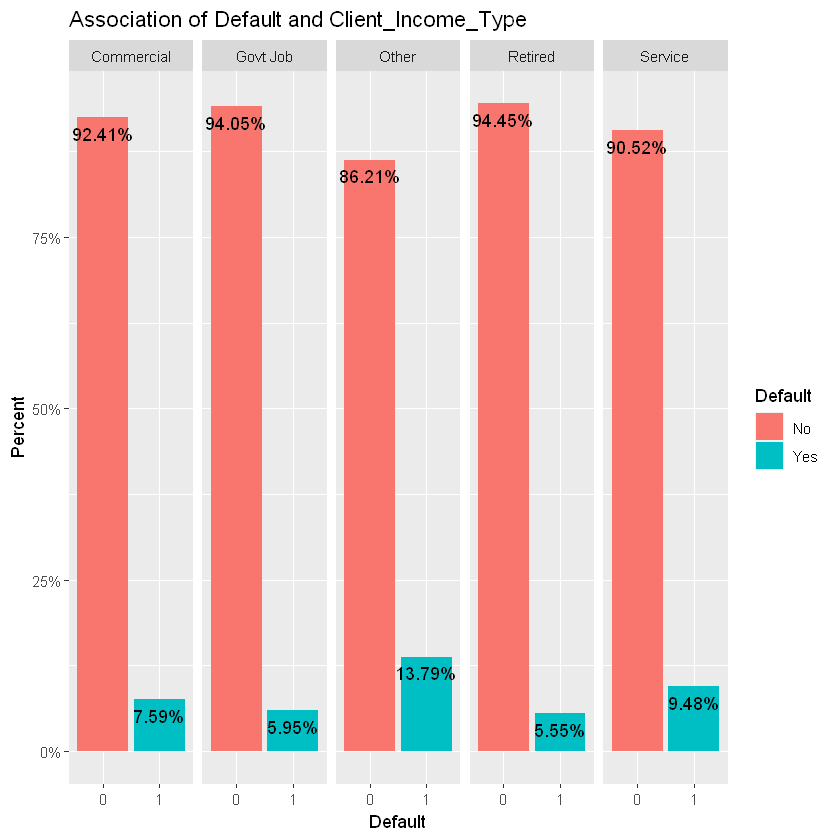

In [21]:
# 01. Association of Default and Client_Income_Type
# Bar chart
ggplot(df, aes(x= Default,  group=Client_Income_Type)) + 
  geom_bar(aes(y = ..prop.., fill = factor(..x..)), stat="count") +
  geom_text(aes( label = scales::percent(..prop..),
                 y= ..prop.. ), stat= "count", vjust = 1.6) +
  labs(y = "Percent", fill="Default") +
  facet_grid(~Client_Income_Type) +
  scale_y_continuous(labels = scales::percent) + 
  scale_fill_discrete( labels = c('No', 'Yes')) +
  ggtitle("Association of Default and Client_Income_Type")


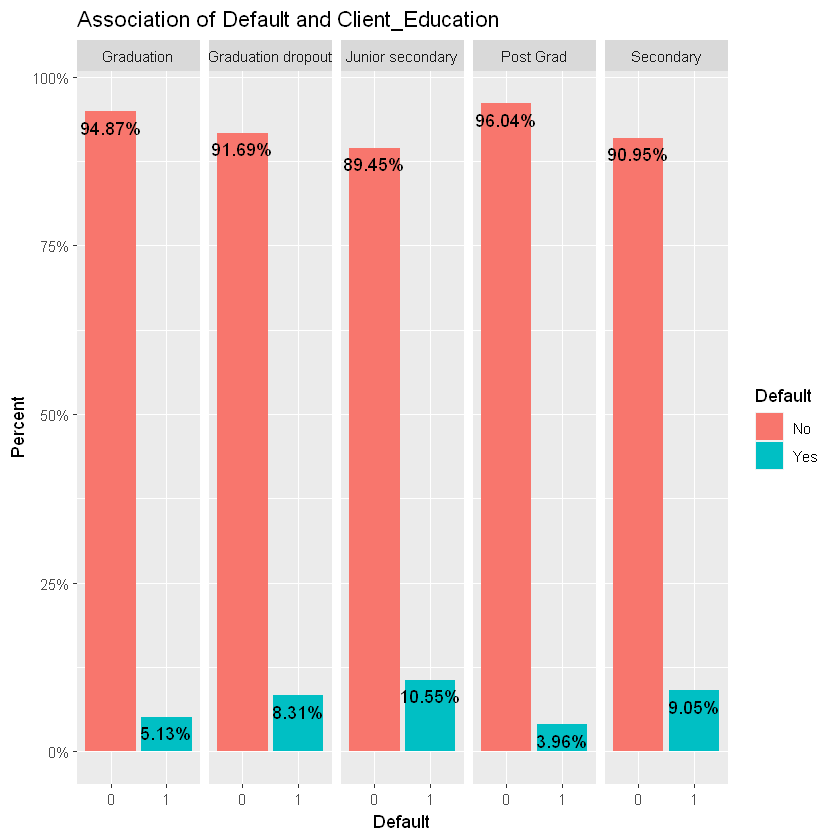

In [22]:
# 02. Association of Default and Client_Education
# Bar chart
ggplot(df, aes(x= Default,  group=Client_Education)) + 
  geom_bar(aes(y = ..prop.., fill = factor(..x..)), stat="count") +
  geom_text(aes( label = scales::percent(..prop..),
                 y= ..prop.. ), stat= "count", vjust = 1.6) +
  labs(y = "Percent", fill="Default") +
  facet_grid(~Client_Education) +
  scale_y_continuous(labels = scales::percent) + 
  scale_fill_discrete( labels = c('No', 'Yes')) +
  ggtitle("Association of Default and Client_Education")


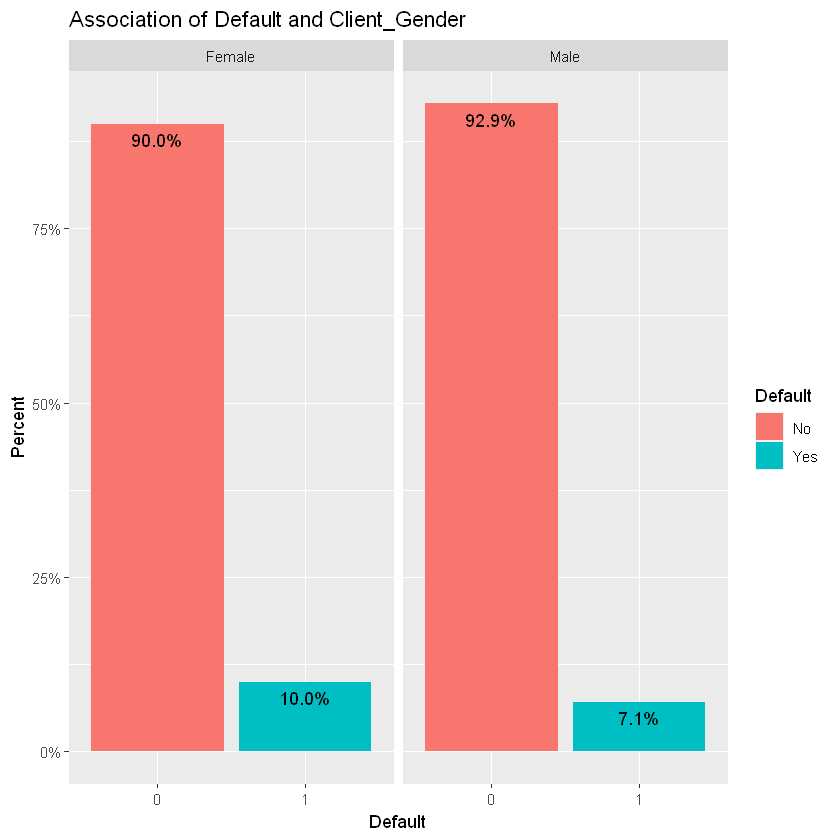

In [23]:
# 03. Association of Default and Client_Gender
# Bar chart
ggplot(df, aes(x= Default,  group=Client_Gender)) + 
  geom_bar(aes(y = ..prop.., fill = factor(..x..)), stat="count") +
  geom_text(aes( label = scales::percent(..prop..),
                 y= ..prop.. ), stat= "count", vjust = 1.6) +
  labs(y = "Percent", fill="Default") +
  facet_grid(~Client_Gender) +
  scale_y_continuous(labels = scales::percent) + 
  scale_fill_discrete( labels = c('No', 'Yes')) +
  ggtitle("Association of Default and Client_Gender")


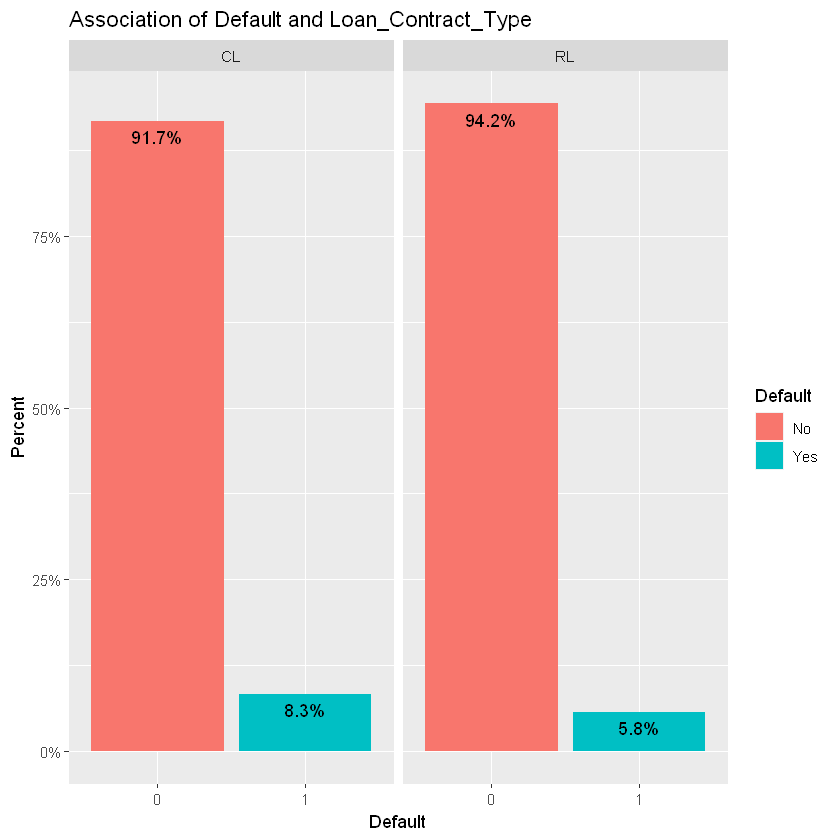

In [24]:
# 04. Association of Default and Loan_Contract_Type
# Bar chart
ggplot(df, aes(x= Default,  group=Loan_Contract_Type)) + 
  geom_bar(aes(y = ..prop.., fill = factor(..x..)), stat="count") +
  geom_text(aes( label = scales::percent(..prop..),
                 y= ..prop.. ), stat= "count", vjust = 1.6) +
  labs(y = "Percent", fill="Default") +
  facet_grid(~Loan_Contract_Type) +
  scale_y_continuous(labels = scales::percent) + 
  scale_fill_discrete( labels = c('No', 'Yes')) +
  ggtitle("Association of Default and Loan_Contract_Type")


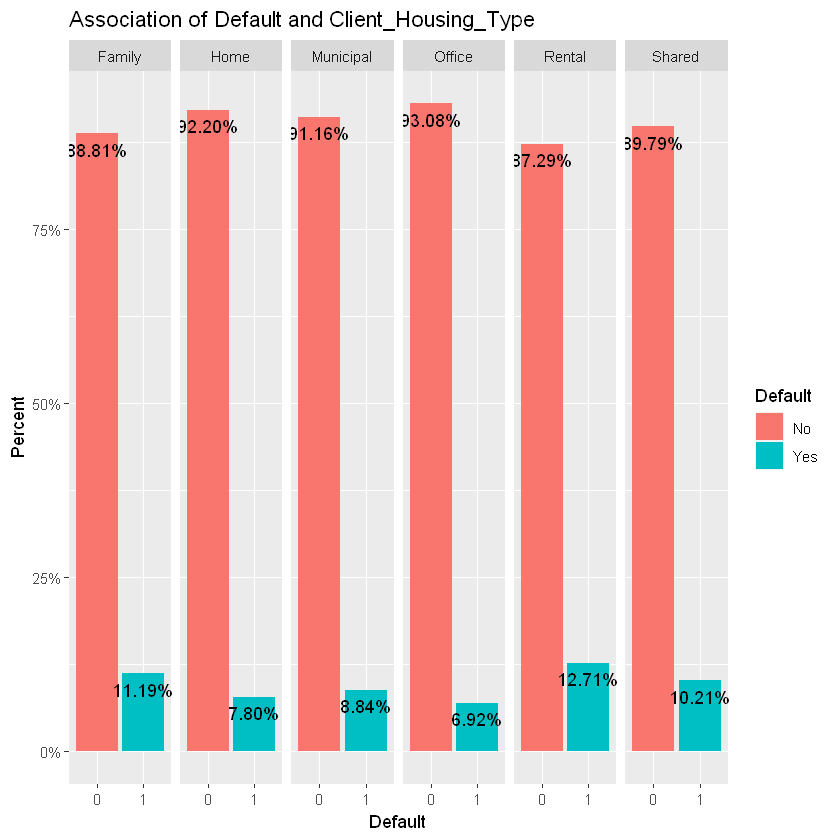

In [25]:
# 05. Association of Default and Client_Housing_Type
# Bar chart
ggplot(df, aes(x= Default,  group=Client_Housing_Type)) + 
  geom_bar(aes(y = ..prop.., fill = factor(..x..)), stat="count") +
  geom_text(aes( label = scales::percent(..prop..),
                 y= ..prop.. ), stat= "count", vjust = 1.6) +
  labs(y = "Percent", fill="Default") +
  facet_grid(~Client_Housing_Type) +
  scale_y_continuous(labels = scales::percent) + 
  scale_fill_discrete( labels = c('No', 'Yes')) +
  ggtitle("Association of Default and Client_Housing_Type")


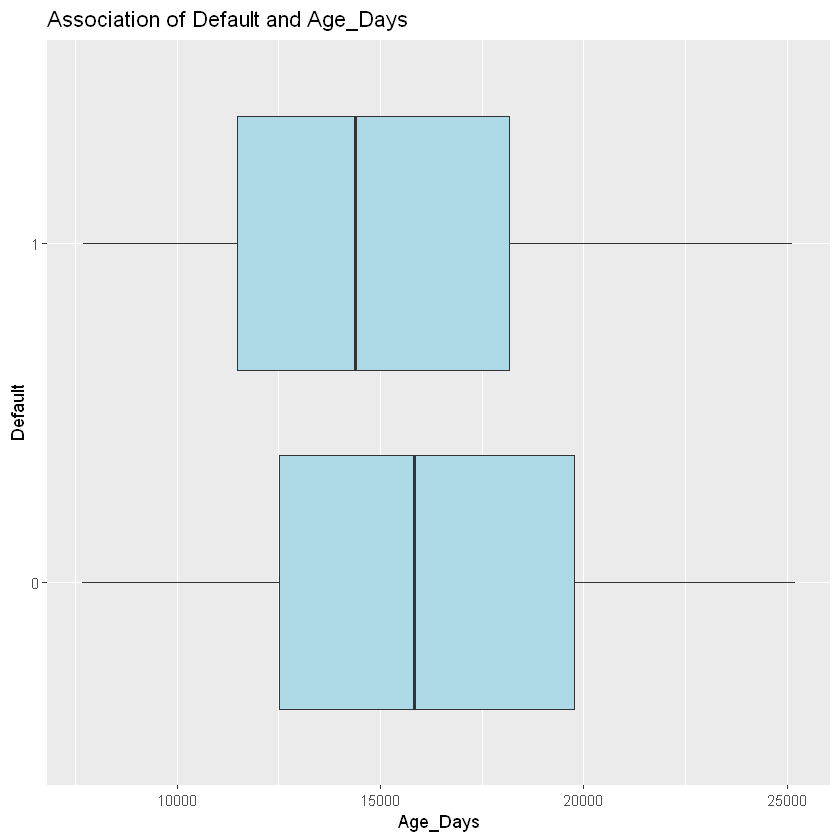

In [26]:
# 06. Association of Default and Age_Days
#Boxplot
temp <- subset(df, !(df$Age_Days %in% outliers(df$Age_Days)))

ggplot(temp, aes(x = Default, y = Age_Days)) + 
  geom_boxplot(fill = 'lightblue', outlier.shape = 4) + 
  coord_flip() +
  ggtitle("Association of Default and Age_Days")

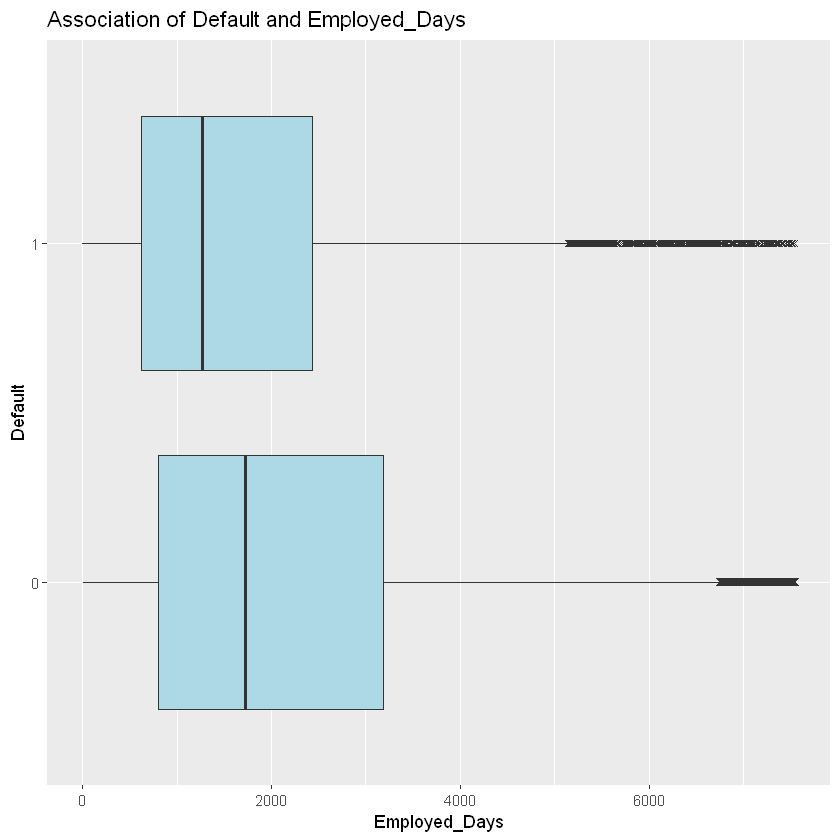

In [27]:
# 07. Association of Default and Employed_Days
#Boxplot
temp <- subset(df, !(df$Employed_Days %in% outliers(df$Employed_Days)))

ggplot(temp, aes(x = Default, y = Employed_Days)) + 
  geom_boxplot(fill = 'lightblue', outlier.shape = 4) + 
  coord_flip() +
  ggtitle("Association of Default and Employed_Days")


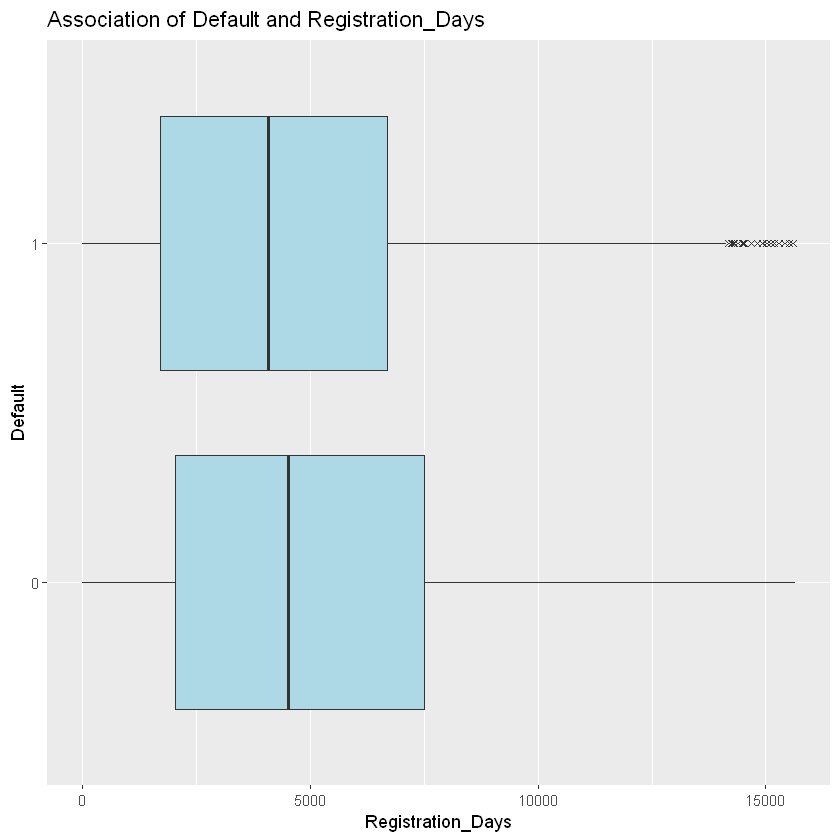

In [28]:
# 08. Association of Default and Registration_Days
#Boxplot
temp <- subset(df, !(df$Registration_Days %in% outliers(df$Registration_Days)))

ggplot(temp, aes(x = Default, y = Registration_Days)) + 
  geom_boxplot(fill = 'lightblue', outlier.shape = 4) + 
  coord_flip() +
  ggtitle("Association of Default and Registration_Days")


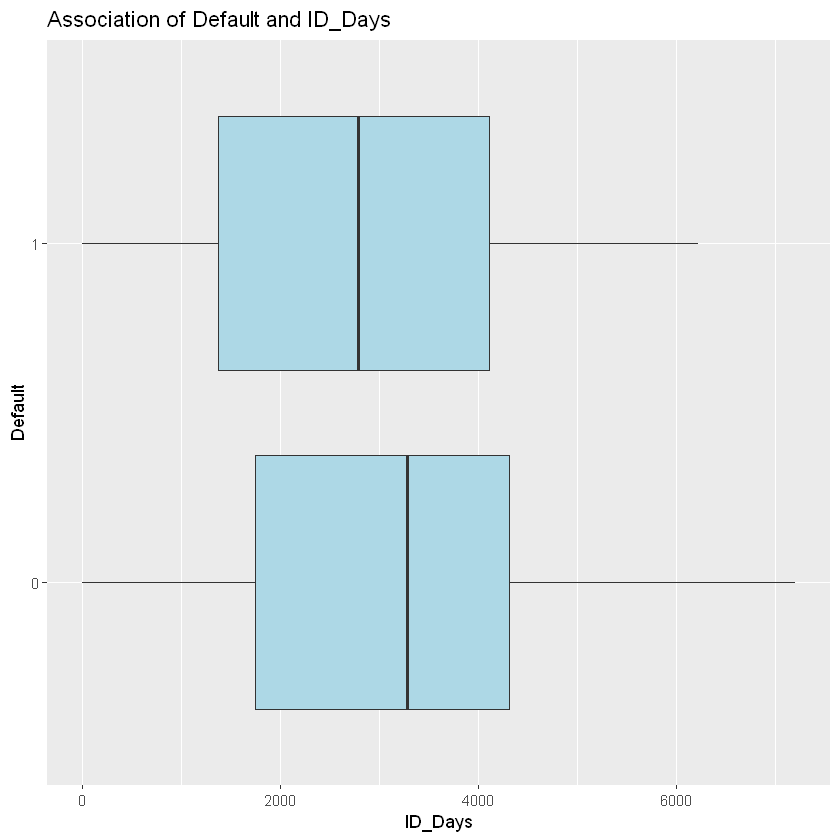

In [29]:
# 09. Association of Default and ID_Days
#Boxplot
temp <- subset(df, !(df$ID_Days %in% outliers(df$ID_Days)))

ggplot(temp, aes(x = Default, y = ID_Days)) + 
  geom_boxplot(fill = 'lightblue', outlier.shape = 4) + 
  coord_flip() +
  ggtitle("Association of Default and ID_Days")


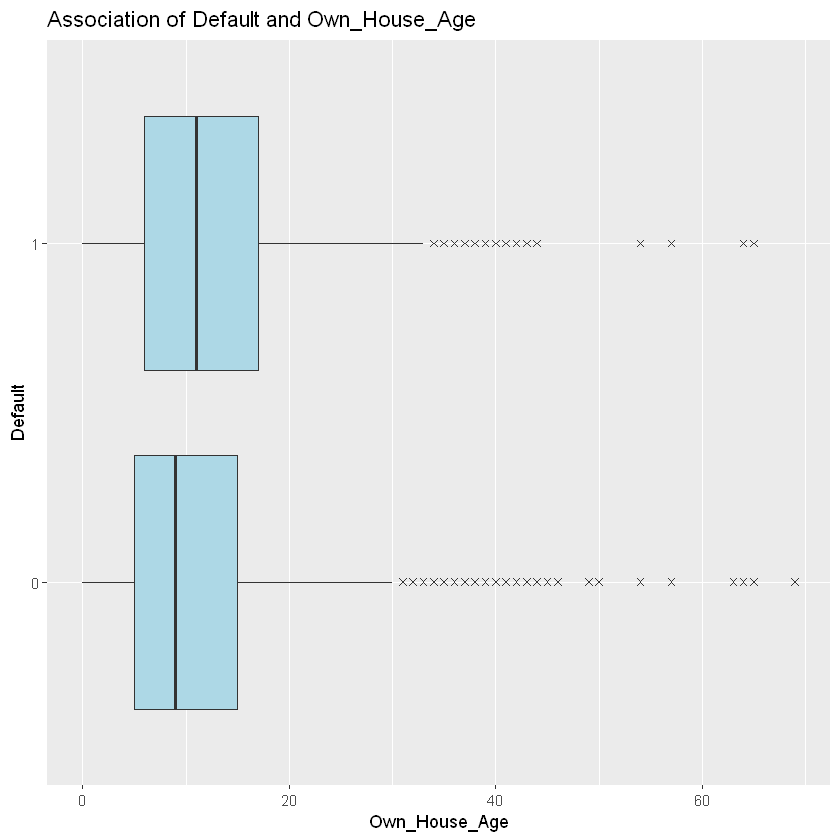

In [30]:
# 10. Association of Default and Own_House_Age
#Boxplot
temp <- subset(df, !(df$Own_House_Age %in% outliers(df$Own_House_Age)))

ggplot(df, aes(x = Default, y = Own_House_Age)) + 
  geom_boxplot(fill = 'lightblue', outlier.shape = 4) + 
  coord_flip() +
  ggtitle("Association of Default and Own_House_Age")


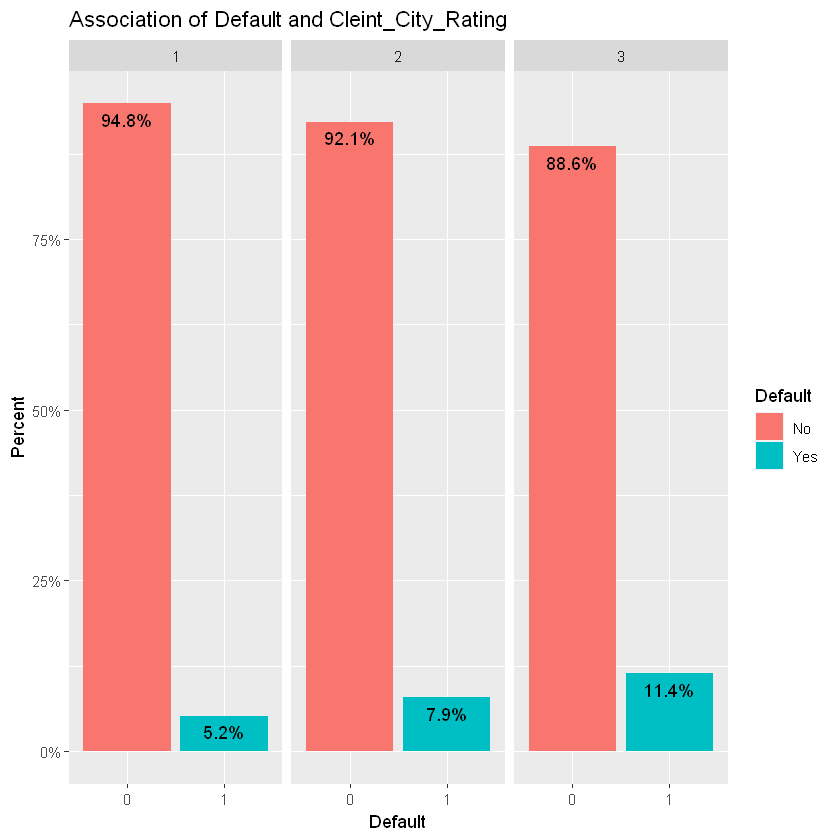

In [31]:
# 11. Association of Default and Cleint_City_Rating
# Workphone_Working
ggplot(df, aes(x= Default,  group=Cleint_City_Rating)) + 
  geom_bar(aes(y = ..prop.., fill = factor(..x..)), stat="count") +
  geom_text(aes( label = scales::percent(..prop..),
                 y= ..prop.. ), stat= "count", vjust = 1.6) +
  labs(y = "Percent", fill="Default") +
  facet_grid(~Cleint_City_Rating) +
  scale_y_continuous(labels = scales::percent) + 
  scale_fill_discrete( labels = c('No', 'Yes')) +
  ggtitle("Association of Default and Cleint_City_Rating")

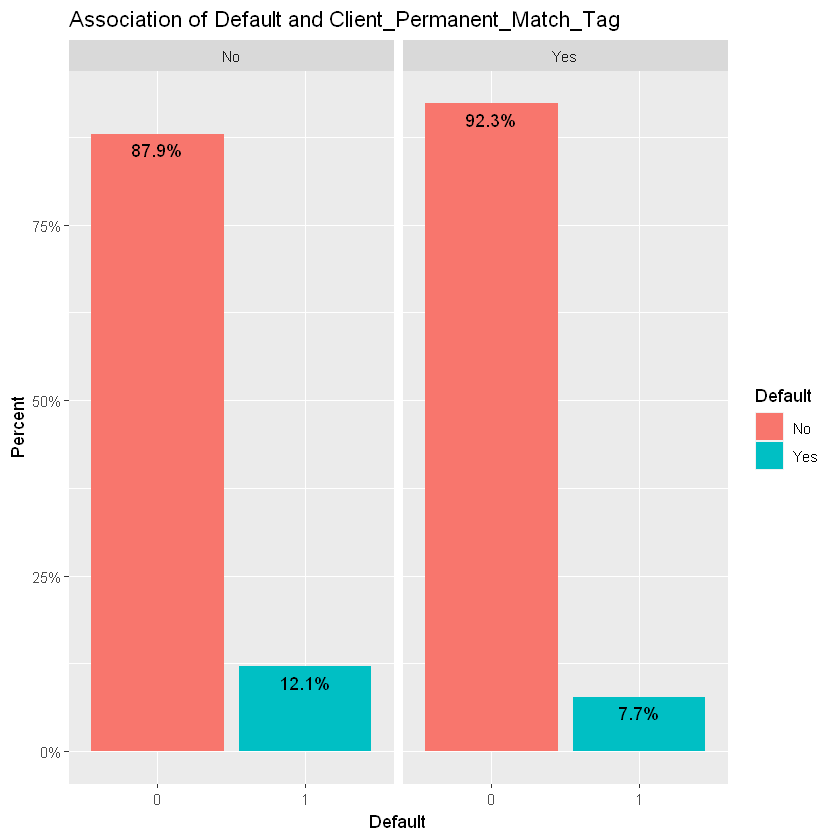

In [32]:
# 12. Association of Default and Client_Permanent_Match_Tag
# Application_Process_Day
ggplot(df, aes(x= Default,  group=Client_Permanent_Match_Tag)) + 
  geom_bar(aes(y = ..prop.., fill = factor(..x..)), stat="count") +
  geom_text(aes( label = scales::percent(..prop..),
                 y= ..prop.. ), stat= "count", vjust = 1.6) +
  labs(y = "Percent", fill="Default") +
  facet_grid(~Client_Permanent_Match_Tag) +
  scale_y_continuous(labels = scales::percent) + 
  scale_fill_discrete( labels = c('No', 'Yes')) +
  ggtitle("Association of Default and Client_Permanent_Match_Tag")


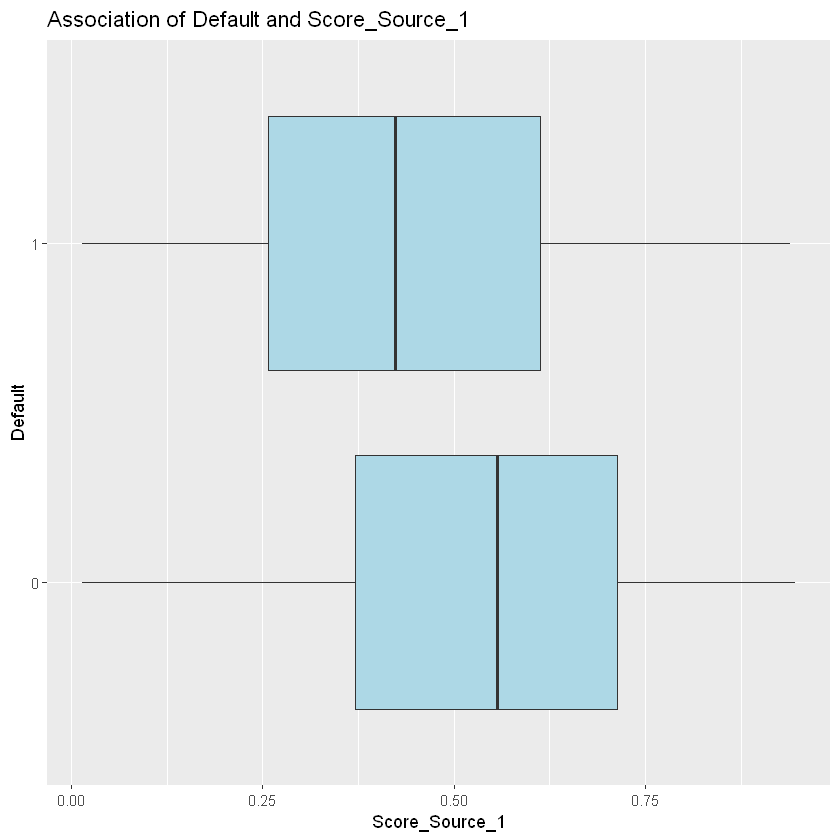

In [33]:
# 13. Association of Default and Score_Source_1
#Boxplot
temp <- subset(df, !(df$Score_Source_1 %in% outliers(df$Score_Source_1)))

ggplot(temp, aes(x = Default, y = Score_Source_1)) + 
  geom_boxplot(fill = 'lightblue', outlier.shape = 4) + 
  coord_flip() +
  ggtitle("Association of Default and Score_Source_1")


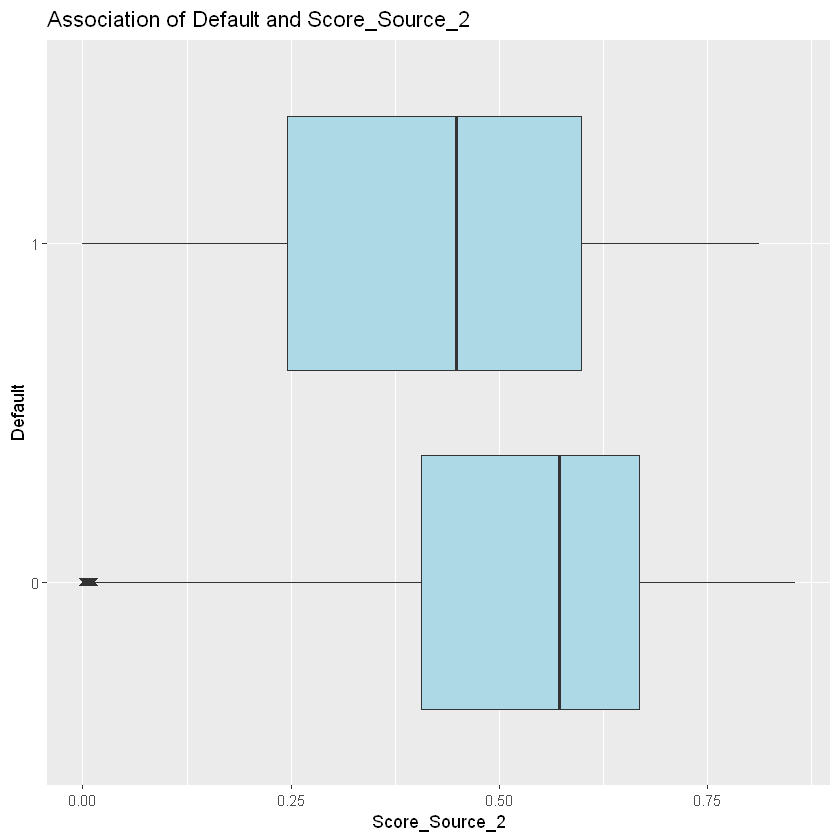

In [34]:
# 14. Association of Default and Score_Source_2
#Boxplot
temp <- subset(df, !(df$Score_Source_2 %in% outliers(df$Score_Source_2)))

ggplot(temp, aes(x = Default, y = Score_Source_2)) + 
  geom_boxplot(fill = 'lightblue', outlier.shape = 4) + 
  coord_flip() +
  ggtitle("Association of Default and Score_Source_2")


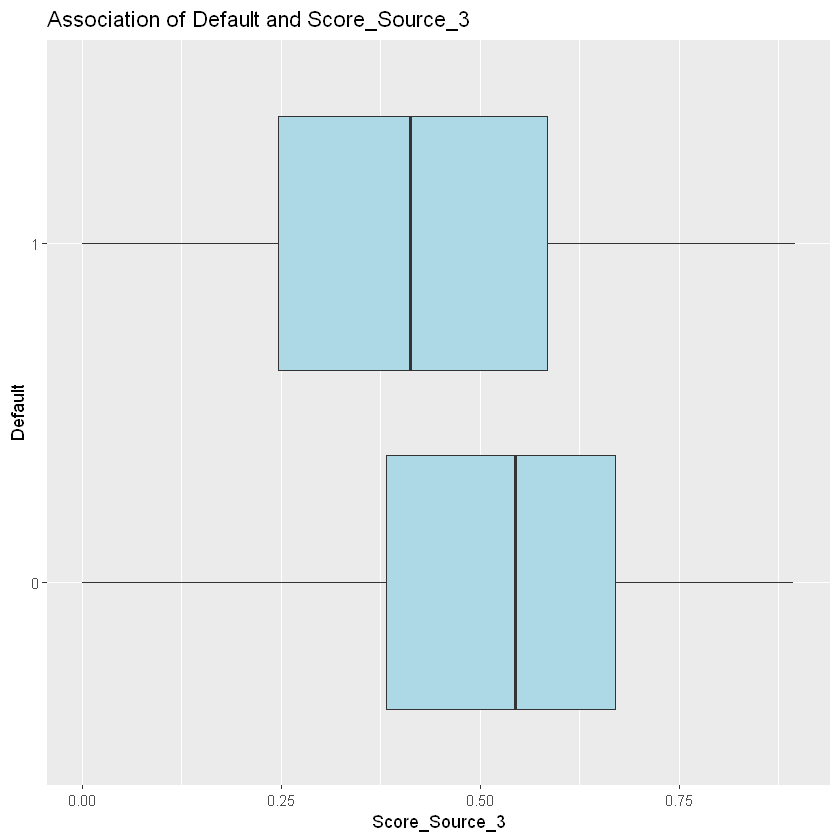

In [35]:
# 15. Association of Default and Score_Source_3
#Boxplot
temp <- subset(df, !(df$Score_Source_3 %in% outliers(df$Score_Source_3)))

ggplot(temp, aes(x = Default, y = Score_Source_3)) + 
  geom_boxplot(fill = 'lightblue', outlier.shape = 4) + 
  coord_flip() +
  ggtitle("Association of Default and Score_Source_3")

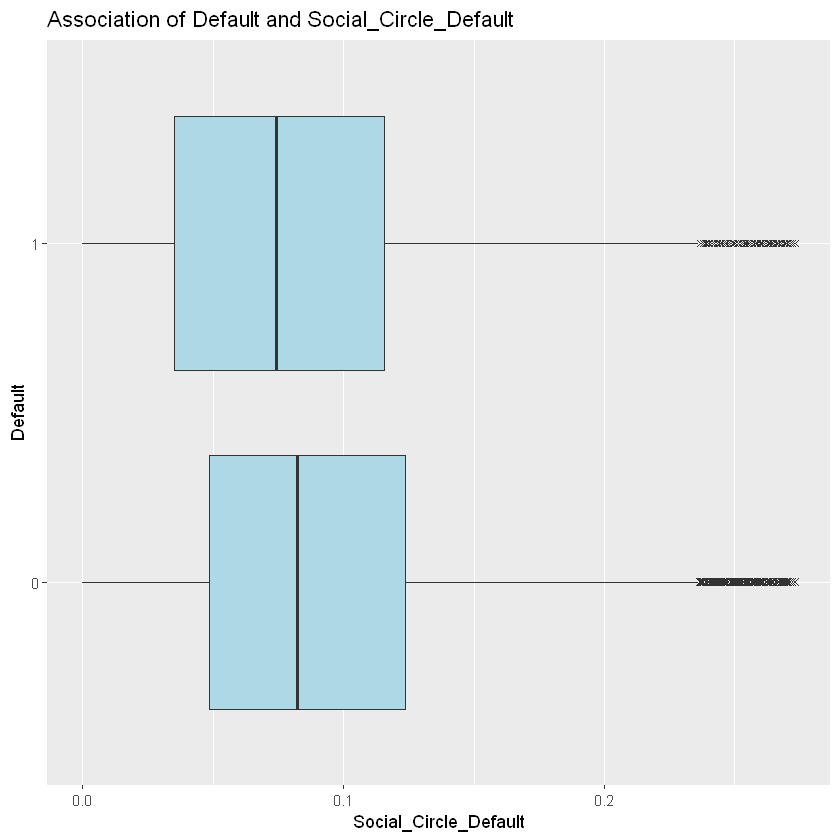

In [36]:
# 16. Association of Default and Social_Circle_Default
#Boxplot
temp <- subset(df, !(df$Social_Circle_Default %in% outliers(df$Social_Circle_Default)))

ggplot(temp, aes(x = Default, y = Social_Circle_Default)) + 
  geom_boxplot(fill = 'lightblue', outlier.shape = 4) + 
  coord_flip() +
  ggtitle("Association of Default and Social_Circle_Default")


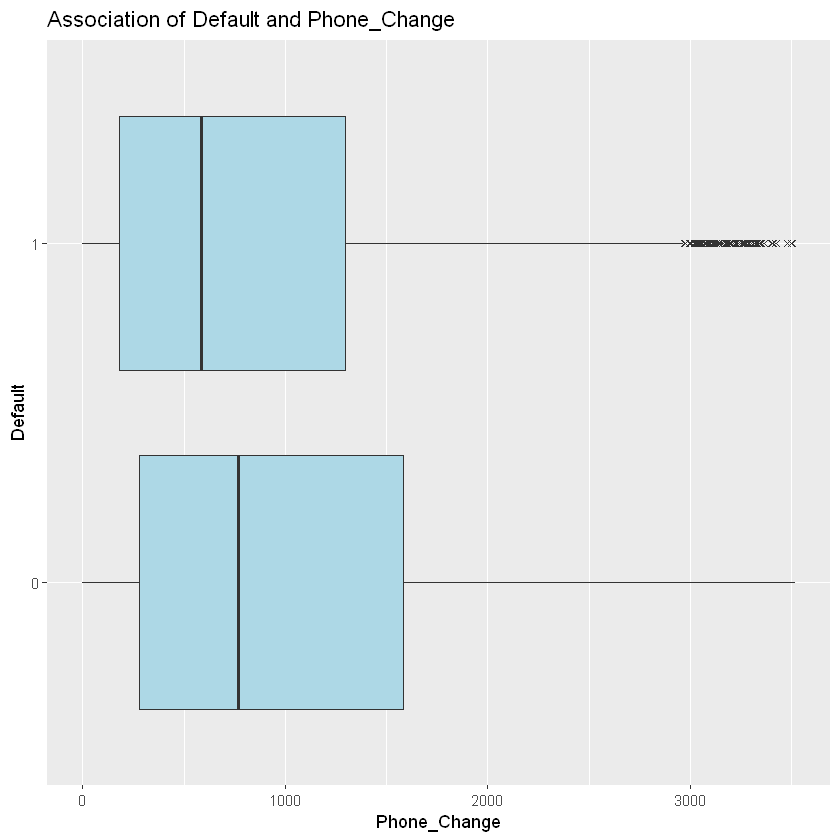

In [37]:
# 17. Association of Default and Phone_Change

#Boxplot
temp <- subset(df, !(df$Phone_Change %in% outliers(df$Phone_Change)))

ggplot(temp, aes(x = Default, y = Phone_Change)) + 
  geom_boxplot(fill = 'lightblue', outlier.shape = 4) + 
  coord_flip() +
  ggtitle("Association of Default and Phone_Change")

In [38]:
rm(temp)

## 5. Hypothesis Testing

In [39]:
# 01. Default and Client_Education
n1 <- sum(df$Client_Education == "Post Grad")
n2 <- sum(df$Client_Education == "Graduation")
win1 <- sum(df$Client_Education == "Post Grad" & df$Default == 1)
win2 <- sum(df$Client_Education == "Graduation" & df$Default == 1)
prop.test(x=c(win1, win2), n=c(n1,n2), alternative = "two.sided", correct = F)


	2-sample test for equality of proportions without continuity
	correction

data:  c(win1, win2) out of c(n1, n2)
X-squared = 0.28218, df = 1, p-value = 0.5953
alternative hypothesis: two.sided
95 percent confidence interval:
 -0.04979116  0.02644360
sample estimates:
    prop 1     prop 2 
0.03960396 0.05127774 


In [40]:
# 02. Default and Client_Gender
G_D <- subset(df, Client_Gender %in% c("Male", "Female"))
tabG_D <- table(G_D$Client_Gender, G_D$Default)
tabG_D
chisq.test(tabG_D, correct = FALSE)

        
             0     1
  Female 37613  4174
  Male   74398  5671


	Pearson's Chi-squared test

data:  tabG_D
X-squared = 312.25, df = 1, p-value < 2.2e-16


In [41]:
# 03. client_income
xbar <- mean(df$Client_Income)
se <- 2/sqrt(nrow(df))
ztest <- (xbar-16000)/se
qnorm(0.95)
pnorm(ztest, lower.tail = F)

t.test(df$Client_Income, mu=16000, alternative = "greater")

power.t.test(n=1000, delta=0.2, sd=1.98, sig.level = 0.1, type="one.sample", alternative = "one.sided")

[1] 1.644854

[1] 0


	One Sample t-test

data:  df$Client_Income
t = 29.971, df = 121855, p-value < 2.2e-16
alternative hypothesis: true mean is greater than 16000
95 percent confidence interval:
 16757.55      Inf
sample estimates:
mean of x 
 16801.54 



     One-sample t test power calculation 

              n = 1000
          delta = 0.2
             sd = 1.98
      sig.level = 0.1
          power = 0.9720205
    alternative = one.sided


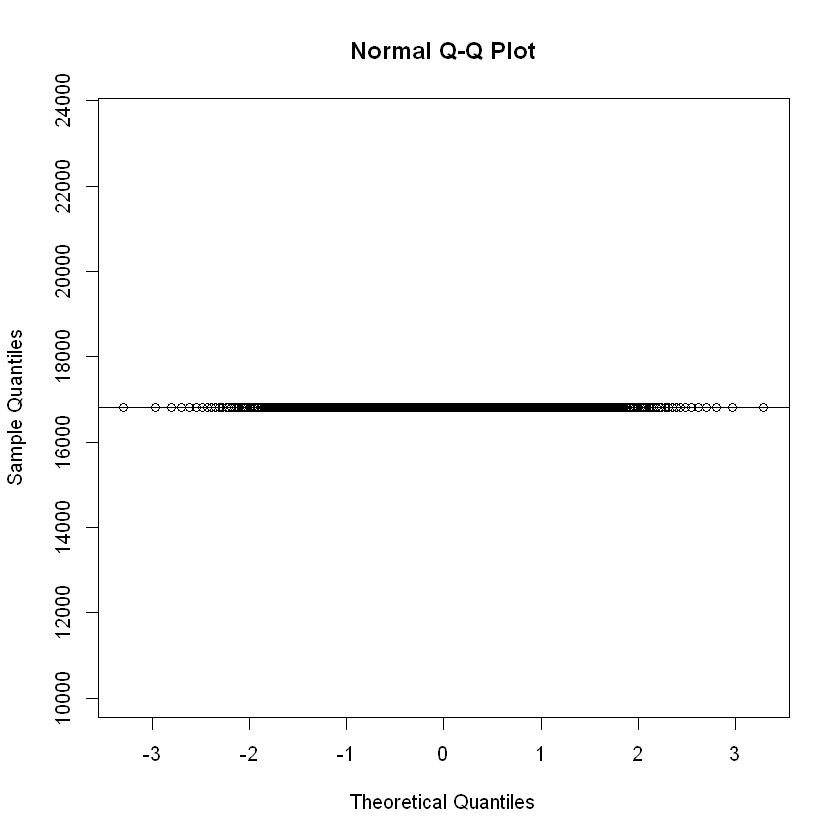

[1] 13460.89 20142.19

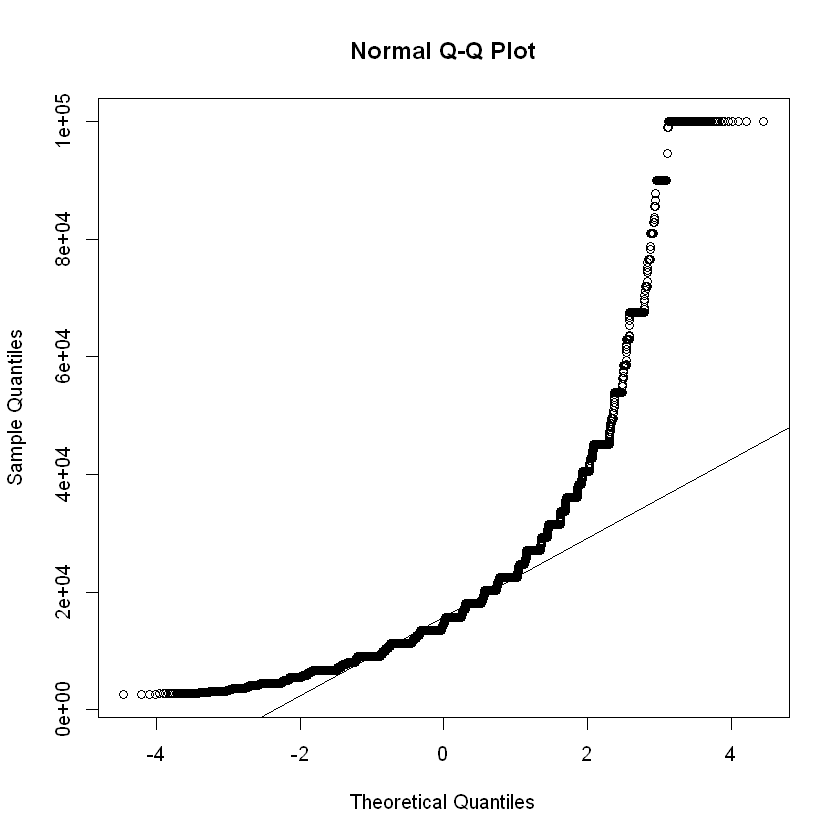

In [42]:
# 04. confidence interval client_income
sd <- sd(df$Client_Income)
n=1000
sample_xbar <- vector("numeric", n)
for (i in 1:n) {
  index <- sample(1:nrow(df), 30)
  my_sample <- df[index, ]
  xbar <- mean(df$Client_Income)
  sample_xbar[i] <- xbar
}
qqnorm(sample_xbar)
qqline(sample_xbar)

qqnorm(df$Client_Income)
qqline(df$Client_Income)

Q <- qnorm(1-0.05/2)
se <- sd/sqrt(30)
interval <- c(xbar-Q*se , xbar+Q*se)
interval

In [43]:
# 05. Default and Client_Housing_Type
n1 <- sum(df$Client_Housing_Type == "Rental")
n2 <- sum(df$Client_Housing_Type %in% c("Family", "Home", "Municipal", "Office", "Shared"))
win1 <- sum(df$Client_Housing_Type == "Rental" & df$Default == 1)
win2 <- sum(df$Client_Housing_Type %in% c("Family", "Home", "Municipal", "Office", "Shared") & df$Default == 1)
prop.test(x=c(win1, win2), n=c(n1,n2), alternative = "two.sided", correct = F)


	2-sample test for equality of proportions without continuity
	correction

data:  c(win1, win2) out of c(n1, n2)
X-squared = 54.637, df = 1, p-value = 1.45e-13
alternative hypothesis: two.sided
95 percent confidence interval:
 0.03181147 0.06219868
sample estimates:
    prop 1     prop 2 
0.12707775 0.08007267 


In [44]:
# 06. Default and Age_Days
n1 <- sum(df$Age_Days >= "15000")
n2 <- sum(df$Age_Days < "15000")
win1 <- sum(df$Age_Days >= "15000" & df$Default == 0)
win2 <- sum(df$Age_Days < "15000" & df$Default == 0)
prop.test(x=c(win1, win2), n=c(n1,n2), alternative = "two.sided", correct = F)


	2-sample test for equality of proportions without continuity
	correction

data:  c(win1, win2) out of c(n1, n2)
X-squared = 224.89, df = 1, p-value < 2.2e-16
alternative hypothesis: two.sided
95 percent confidence interval:
 0.02100881 0.02758000
sample estimates:
   prop 1    prop 2 
0.9281152 0.9038208 


In [45]:
# 07. Default and Cleint_City_Rating
n1 <- sum(df$Cleint_City_Rating == "1")
n2 <- sum(df$Cleint_City_Rating == "2")
win1 <- sum(df$Cleint_City_Rating == "1" & df$Default == 1)
win2 <- sum(df$Cleint_City_Rating == "2" & df$Default == 1)
prop.test(x=c(win1, win2), n=c(n1,n2), alternative = "two.sided", correct = F)

n1 <- sum(df$Cleint_City_Rating == "1")
n2 <- sum(df$Cleint_City_Rating == "3")
win1 <- sum(df$Cleint_City_Rating == "1" & df$Default == 1)
win2 <- sum(df$Cleint_City_Rating == "3" & df$Default == 1)
prop.test(x=c(win1, win2), n=c(n1,n2), alternative = "two.sided", correct = F)


	2-sample test for equality of proportions without continuity
	correction

data:  c(win1, win2) out of c(n1, n2)
X-squared = 126.38, df = 1, p-value < 2.2e-16
alternative hypothesis: two.sided
95 percent confidence interval:
 -0.03125084 -0.02305843
sample estimates:
    prop 1     prop 2 
0.05164627 0.07880090 



	2-sample test for equality of proportions without continuity
	correction

data:  c(win1, win2) out of c(n1, n2)
X-squared = 379.35, df = 1, p-value < 2.2e-16
alternative hypothesis: two.sided
95 percent confidence interval:
 -0.06854134 -0.05653385
sample estimates:
    prop 1     prop 2 
0.05164627 0.11418387 


## Predictive Models

In [46]:
#Loading Dataset
df <- read.csv('Train_Imputed_norm.csv', stringsAsFactors = T)
df$Default <- factor(df$Default)

In [47]:
# Split dataset to train and test Sets
set.seed(500)
spt <- sample.split(df$Default, SplitRatio = 0.8)
train <- subset(df, spt == T)
test  <- subset(df, spt == F)
rm(spt)

## Logistic Regression

In [48]:
lr_model = glm(Default ~ . -ID -Mobile_Tag, data = train, family = 'binomial')
summary(lr_model)


Call:
glm(formula = Default ~ . - ID - Mobile_Tag, family = "binomial", 
    data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.3816  -0.4376  -0.3245  -0.2379   3.2266  

Coefficients:
                                       Estimate Std. Error z value Pr(>|z|)    
(Intercept)                          -8.041e-01  5.569e-01  -1.444 0.148734    
Client_Income                        -3.631e-06  1.840e-06  -1.974 0.048410 *  
Car_Owned                            -2.617e-01  2.880e-02  -9.088  < 2e-16 ***
Bike_Owned                            8.136e-03  2.576e-02   0.316 0.752124    
Active_Loan                           8.235e-03  2.432e-02   0.339 0.734952    
House_Own                             7.015e-02  2.776e-02   2.528 0.011486 *  
Child_Count                          -1.508e-01  3.707e-01  -0.407 0.684074    
Credit_Amount                        -1.153e-06  5.094e-07  -2.264 0.023592 *  
Loan_Annuity                          6.854e-05  1.422e-05 

In [49]:
lr_model = glm(Default ~ . -ID - Mobile_Tag -Bike_Owned -Active_Loan -Application_Process_Hour
                           -Child_Count -Type_Organization -Client_Occupation
                           -Population_Region_Relative -Registration_Days -Client_Contact_Work_Tag
                           -Accompany_Client -Client_Marital_Status -Credit_Bureau
                           -Client_Family_Members -Homephone_Tag
                     , data = train, family = 'binomial' )
summary(lr_model)


Call:
glm(formula = Default ~ . - ID - Mobile_Tag - Bike_Owned - Active_Loan - 
    Application_Process_Hour - Child_Count - Type_Organization - 
    Client_Occupation - Population_Region_Relative - Registration_Days - 
    Client_Contact_Work_Tag - Accompany_Client - Client_Marital_Status - 
    Credit_Bureau - Client_Family_Members - Homephone_Tag, family = "binomial", 
    data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.3994  -0.4387  -0.3258  -0.2408   3.2314  

Coefficients:
                                     Estimate Std. Error z value Pr(>|z|)    
(Intercept)                        -3.957e-01  1.140e-01  -3.471 0.000518 ***
Client_Income                      -3.690e-06  1.774e-06  -2.080 0.037507 *  
Car_Owned                          -2.610e-01  2.837e-02  -9.200  < 2e-16 ***
House_Own                           6.486e-02  2.733e-02   2.374 0.017614 *  
Credit_Amount                      -1.451e-06  5.047e-07  -2.875 0.004037 ** 
Loan_Annu

In [50]:
# Model Optimization
pred <- predict(lr_model, type = 'response')
pred_class <- factor(ifelse(pred >= 0.08, 1, 0))
confusionMatrix(pred_class, train$Default)

Confusion Matrix and Statistics

          Reference
Prediction     0     1
         0 59872  2636
         1 29737  5240
                                         
               Accuracy : 0.6679         
                 95% CI : (0.665, 0.6709)
    No Information Rate : 0.9192         
    P-Value [Acc > NIR] : 1              
                                         
                  Kappa : 0.1298         
                                         
 Mcnemar's Test P-Value : <2e-16         
                                         
            Sensitivity : 0.6681         
            Specificity : 0.6653         
         Pos Pred Value : 0.9578         
         Neg Pred Value : 0.1498         
             Prevalence : 0.9192         
         Detection Rate : 0.6142         
   Detection Prevalence : 0.6412         
      Balanced Accuracy : 0.6667         
                                         
       'Positive' Class : 0              
                                      

[1] 0.7267652

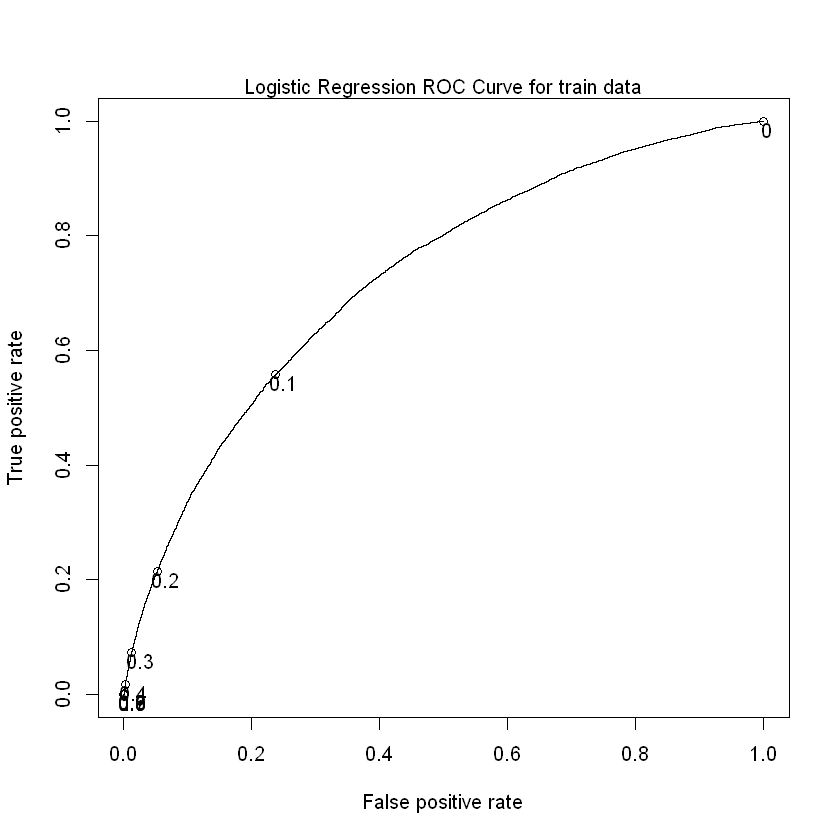

In [51]:
# ROC Curve for train dataset
pred_roc <- prediction(predictions = pred, labels = train$Default)
perf_roc <- performance(pred_roc, 'tpr', 'fpr')
plot(perf_roc, print.cutoffs.at = seq(0, 1, 0.1), text.adj = c(0.2, 1))
mtext(side = 3, text="Logistic Regression ROC Curve for train data")

auc <- performance(pred_roc, "auc")
auc <- as.numeric(auc@y.values)
auc

In [52]:
# Model Performance
pred <- predict(lr_model, newdata = test, type = 'response')
pred_class <- factor(ifelse(pred >= 0.08, 1, 0))
confusionMatrix(pred_class, test$Default)

Confusion Matrix and Statistics

          Reference
Prediction     0     1
         0 15015   689
         1  7387  1280
                                          
               Accuracy : 0.6686          
                 95% CI : (0.6627, 0.6745)
    No Information Rate : 0.9192          
    P-Value [Acc > NIR] : 1               
                                          
                  Kappa : 0.1256          
                                          
 Mcnemar's Test P-Value : <2e-16          
                                          
            Sensitivity : 0.6703          
            Specificity : 0.6501          
         Pos Pred Value : 0.9561          
         Neg Pred Value : 0.1477          
             Prevalence : 0.9192          
         Detection Rate : 0.6161          
   Detection Prevalence : 0.6444          
      Balanced Accuracy : 0.6602          
                                          
       'Positive' Class : 0               
                  

[1] 0.7193182

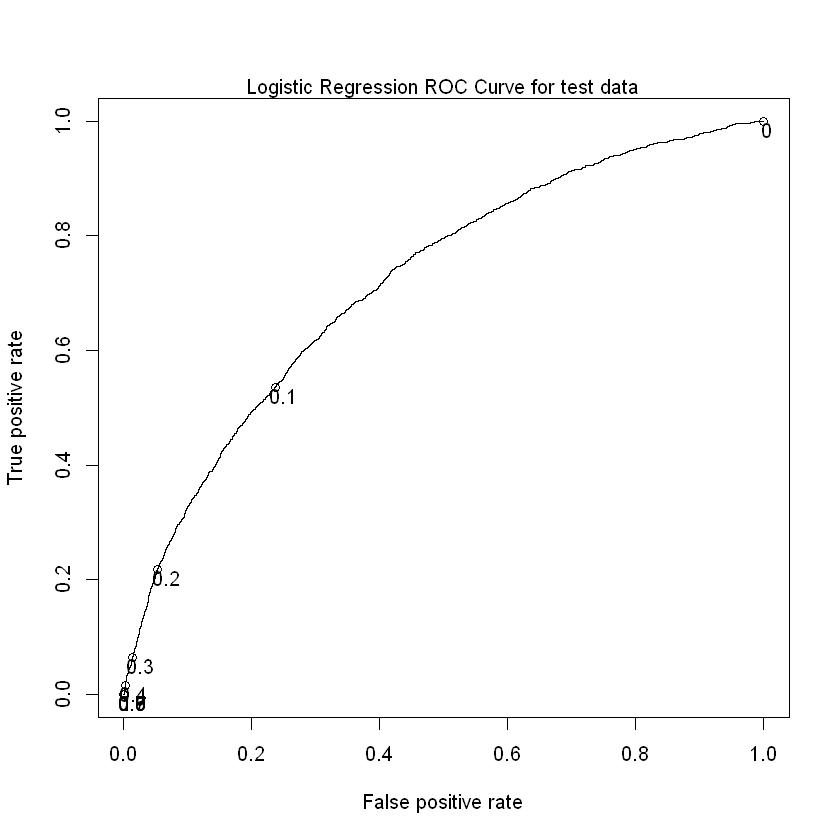

In [53]:
# ROC Curve for test Dataset
pred_roc <- prediction(predictions = pred, labels = test$Default)
perf_roc <- performance(pred_roc, 'tpr', 'fpr')
plot(perf_roc, print.cutoffs.at = seq(0, 1, 0.1), text.adj = c(0.2, 1))
mtext(side = 3, text="Logistic Regression ROC Curve for test data")

auc <- performance(pred_roc, "auc")
auc <- as.numeric(auc@y.values)
auc

### Decision Tree

In [54]:
# Specifying Num. and Cat. Variables
num_cols <- c('Client_Income', 'Credit_Amount', 'Loan_Annuity', 'Population_Region_Relative',
              'Age_Days', 'Employed_Days', 'Registration_Days', 'ID_Days', 'Own_House_Age',
              'Application_Process_Hour', 'Score_Source_1', 'Score_Source_2', 'Score_Source_3',
              'Social_Circle_Default', 'Phone_Change', 'Credit_Bureau', 'Child_Count', 'Client_Family_Members')

cat_cols <- c('Car_Owned', 'Bike_Owned', 'Active_Loan', 'House_Own', 'Accompany_Client',
              'Client_Income_Type', 'Client_Education', 'Client_Marital_Status',
              'Client_Gender', 'Loan_Contract_Type', 'Client_Housing_Type', 'Mobile_Tag',
              'Homephone_Tag', 'Workphone_Working', 'Client_Occupation', 'Cleint_City_Rating',
              'Client_Permanent_Match_Tag', 'Client_Contact_Work_Tag', 'Type_Organization',
              'Application_Process_Day')

# Normalize Num. Variables
cols <- num_cols
pre_proc_val <- preProcess(train[,cols], method = c("center", "scale"))

train[,cols] = predict(pre_proc_val, train[,cols])
test[,cols] = predict(pre_proc_val, test[,cols])

# Converting Cat. Variables to Factor
train[cat_cols] <- lapply(train[cat_cols], factor)
test[cat_cols] <- lapply(test[cat_cols], factor)

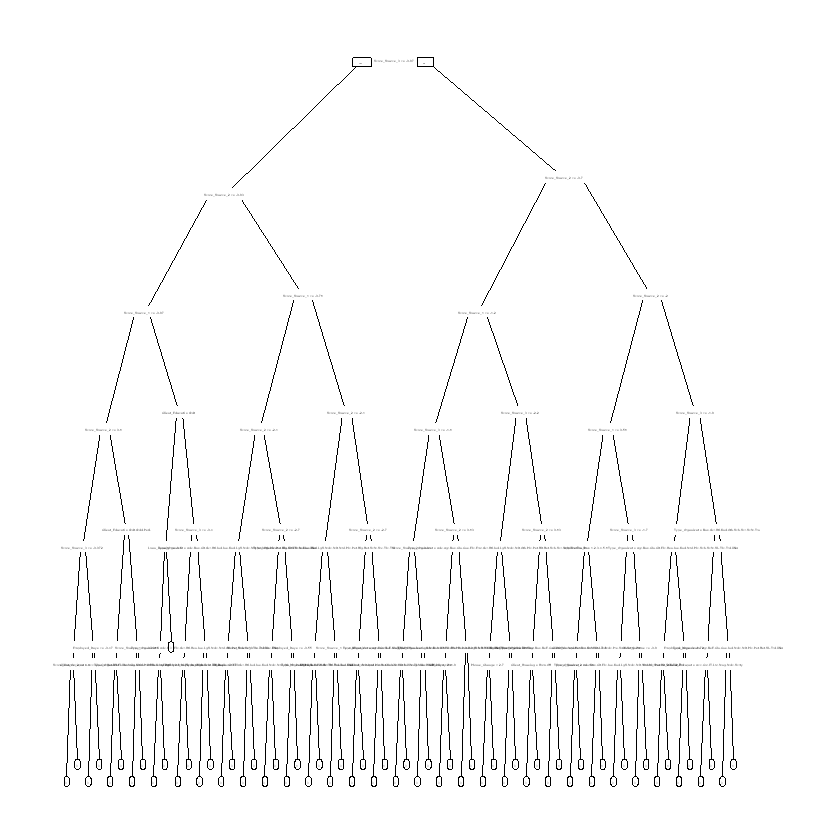

In [55]:
t_model = rpart(Default ~ . -ID -Mobile_Tag, data = train, method = 'class', maxdepth = 6, cp = -1)
prp(t_model)

In [56]:
# Model Optimization
pred <- predict(t_model, type = 'prob')
pred <- pred[,2]
pred_class <- factor(ifelse(pred >= 0.08, 1, 0))
confusionMatrix(pred_class, train$Default)

Confusion Matrix and Statistics

          Reference
Prediction     0     1
         0 58884  2673
         1 30725  5203
                                          
               Accuracy : 0.6574          
                 95% CI : (0.6544, 0.6604)
    No Information Rate : 0.9192          
    P-Value [Acc > NIR] : 1               
                                          
                  Kappa : 0.1211          
                                          
 Mcnemar's Test P-Value : <2e-16          
                                          
            Sensitivity : 0.6571          
            Specificity : 0.6606          
         Pos Pred Value : 0.9566          
         Neg Pred Value : 0.1448          
             Prevalence : 0.9192          
         Detection Rate : 0.6040          
   Detection Prevalence : 0.6315          
      Balanced Accuracy : 0.6589          
                                          
       'Positive' Class : 0               
                  

[1] 0.7195659

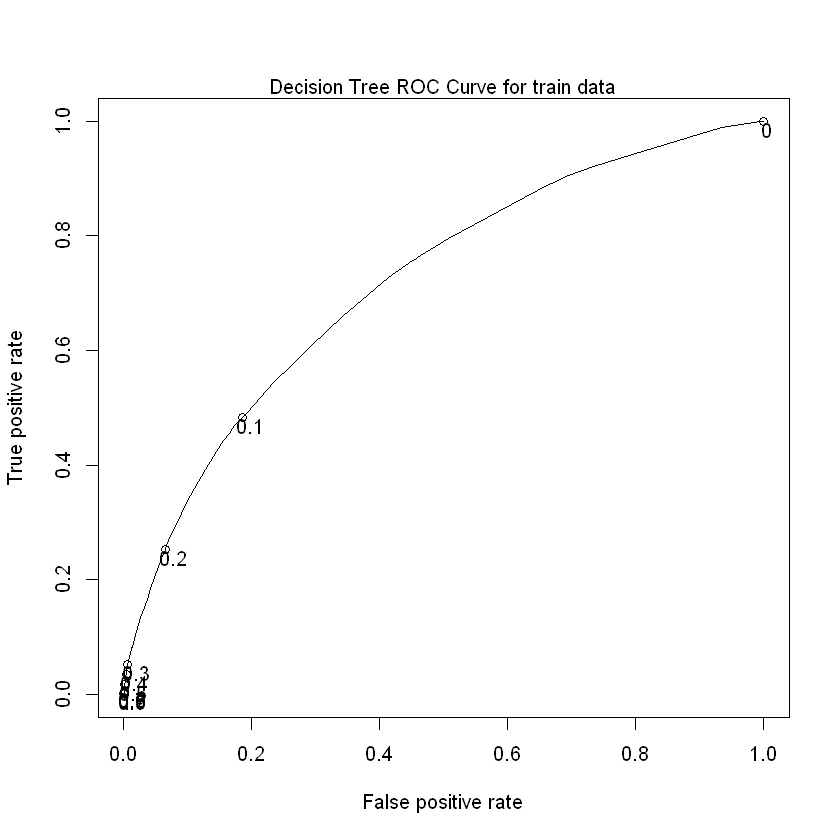

In [57]:
# ROC Curve for train dataset
pred_roc <- prediction(predictions = pred, labels = train$Default)
perf_roc <- performance(pred_roc, 'tpr', 'fpr')
plot(perf_roc, print.cutoffs.at = seq(0, 1, 0.1), text.adj = c(0.2, 1))
mtext(side = 3, text="Decision Tree ROC Curve for train data")

auc <- performance(pred_roc, "auc")
auc <- as.numeric(auc@y.values)
auc

In [58]:
# Model Performance
pred <- predict(t_model, newdata = test, type = 'prob')
pred <- pred[,2]
pred_class <- factor(ifelse(pred >= 0.08, 1, 0))
confusionMatrix(pred_class, test$Default)

Confusion Matrix and Statistics

          Reference
Prediction     0     1
         0 14638   751
         1  7764  1218
                                          
               Accuracy : 0.6506          
                 95% CI : (0.6446, 0.6566)
    No Information Rate : 0.9192          
    P-Value [Acc > NIR] : 1               
                                          
                  Kappa : 0.1037          
                                          
 Mcnemar's Test P-Value : <2e-16          
                                          
            Sensitivity : 0.6534          
            Specificity : 0.6186          
         Pos Pred Value : 0.9512          
         Neg Pred Value : 0.1356          
             Prevalence : 0.9192          
         Detection Rate : 0.6006          
   Detection Prevalence : 0.6314          
      Balanced Accuracy : 0.6360          
                                          
       'Positive' Class : 0               
                  

[1] 0.6870254

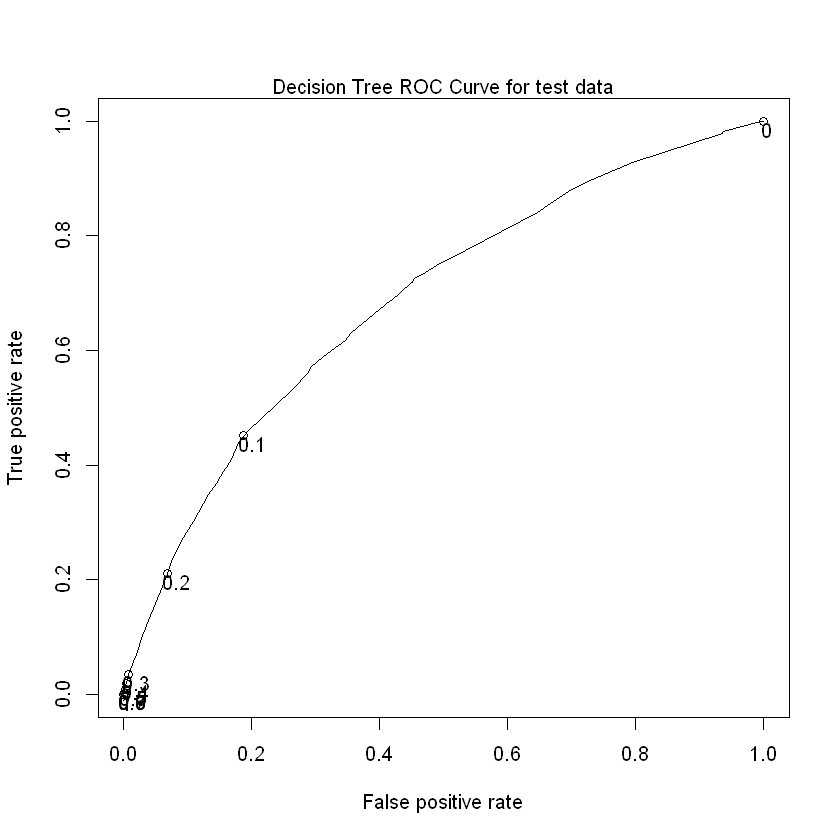

In [59]:
# ROC Curve for test dataset
pred_roc <- prediction(predictions = pred, labels = test$Default)
perf_roc <- performance(pred_roc, 'tpr', 'fpr')
plot(perf_roc, print.cutoffs.at = seq(0, 1, 0.1), text.adj = c(0.2, 1))
mtext(side = 3, text="Decision Tree ROC Curve for test data")

auc <- performance(pred_roc, "auc")
auc <- as.numeric(auc@y.values)
auc

## Random Forest

In [60]:
rf_model <- randomForest(Default ~ . -ID -Mobile_Tag
                        , data = train, ntree = 500)
rf_model


Call:
 randomForest(formula = Default ~ . - ID - Mobile_Tag, data = train,      ntree = 500) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 6

        OOB estimate of  error rate: 7.7%
Confusion matrix:
      0   1  class.error
0 89605   4 4.463837e-05
1  7501 375 9.523870e-01

In [61]:
rf_model <- randomForest(Default ~ . -ID -Mobile_Tag -House_Own -Bike_Owned -Active_Loan
                                     -Car_Owned -Workphone_Working
                        , data = train, ntree = 500)
rf_model


Call:
 randomForest(formula = Default ~ . - ID - Mobile_Tag - House_Own -      Bike_Owned - Active_Loan - Car_Owned - Workphone_Working,      data = train, ntree = 500) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 5

        OOB estimate of  error rate: 7.71%
Confusion matrix:
      0   1  class.error
0 89604   5 5.579797e-05
1  7510 366 9.535297e-01

In [62]:
# Model Optimization
pred <- predict(rf_model, type = 'prob')
pred <- pred[,2]
pred_class <- factor(ifelse(pred >= 0.11, 1, 0))
confusionMatrix(pred_class, train$Default)

Confusion Matrix and Statistics

          Reference
Prediction     0     1
         0 63349  2558
         1 26260  5318
                                          
               Accuracy : 0.7044          
                 95% CI : (0.7015, 0.7072)
    No Information Rate : 0.9192          
    P-Value [Acc > NIR] : 1               
                                          
                  Kappa : 0.1611          
                                          
 Mcnemar's Test P-Value : <2e-16          
                                          
            Sensitivity : 0.7069          
            Specificity : 0.6752          
         Pos Pred Value : 0.9612          
         Neg Pred Value : 0.1684          
             Prevalence : 0.9192          
         Detection Rate : 0.6498          
   Detection Prevalence : 0.6761          
      Balanced Accuracy : 0.6911          
                                          
       'Positive' Class : 0               
                  

[1] 0.7604418

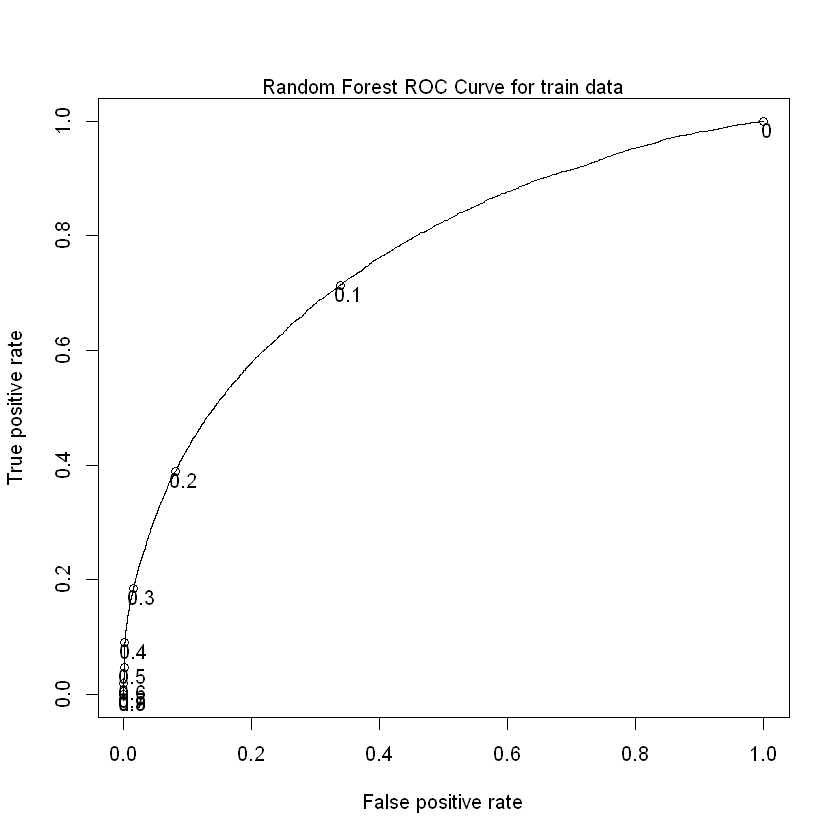

In [63]:
# ROC Curve for train dataset
pred_roc <- prediction(predictions = pred, labels = train$Default)
perf_roc <- performance(pred_roc, 'tpr', 'fpr')
plot(perf_roc, print.cutoffs.at = seq(0, 1, 0.1), text.adj = c(0.2, 1))
mtext(side = 3, text="Random Forest ROC Curve for train data")

auc <- performance(pred_roc, "auc")
auc <- as.numeric(auc@y.values)
auc

In [64]:
# Model Performance
pred <- predict(rf_model, newdata = test, type = 'prob')
pred <- pred[,2]
pred_class <- factor(ifelse(pred >= 0.11, 1, 0))
confusionMatrix(pred_class, test$Default)

Confusion Matrix and Statistics

          Reference
Prediction     0     1
         0 15831   631
         1  6571  1338
                                          
               Accuracy : 0.7045          
                 95% CI : (0.6987, 0.7102)
    No Information Rate : 0.9192          
    P-Value [Acc > NIR] : 1               
                                          
                  Kappa : 0.1626          
                                          
 Mcnemar's Test P-Value : <2e-16          
                                          
            Sensitivity : 0.7067          
            Specificity : 0.6795          
         Pos Pred Value : 0.9617          
         Neg Pred Value : 0.1692          
             Prevalence : 0.9192          
         Detection Rate : 0.6496          
   Detection Prevalence : 0.6755          
      Balanced Accuracy : 0.6931          
                                          
       'Positive' Class : 0               
                  

[1] 0.7626858

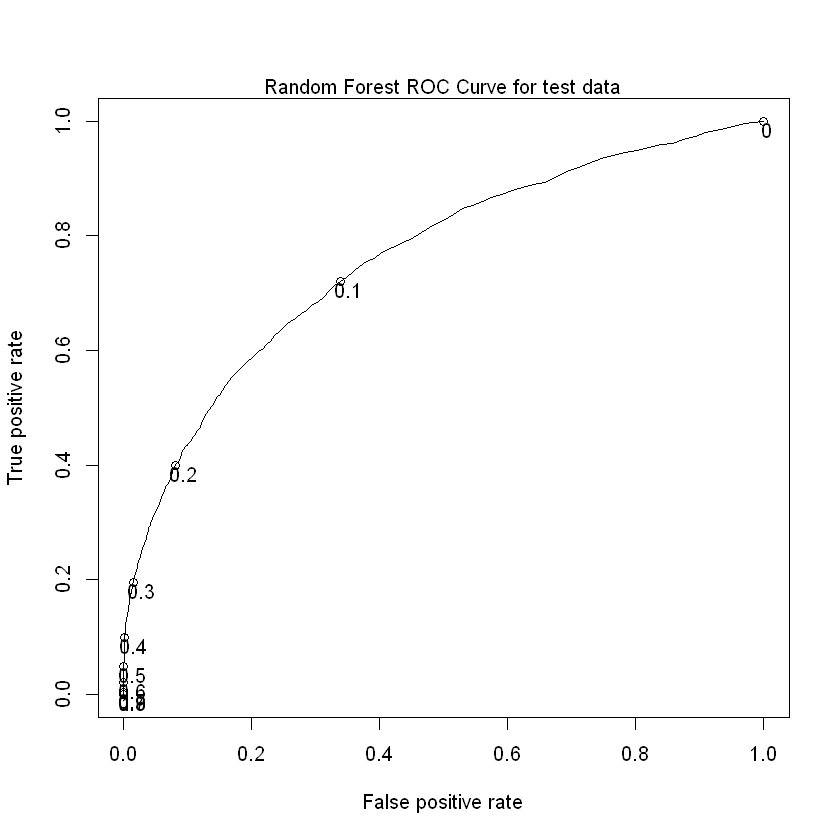

In [65]:
# ROC Curve for test dataset
pred_roc <- prediction(predictions = pred, labels = test$Default)
perf_roc <- performance(pred_roc, 'tpr', 'fpr')
plot(perf_roc, print.cutoffs.at = seq(0, 1, 0.1), text.adj = c(0.2, 1))
mtext(side = 3, text="Random Forest ROC Curve for test data")

auc <- performance(pred_roc, "auc")
auc <- as.numeric(auc@y.values)
auc

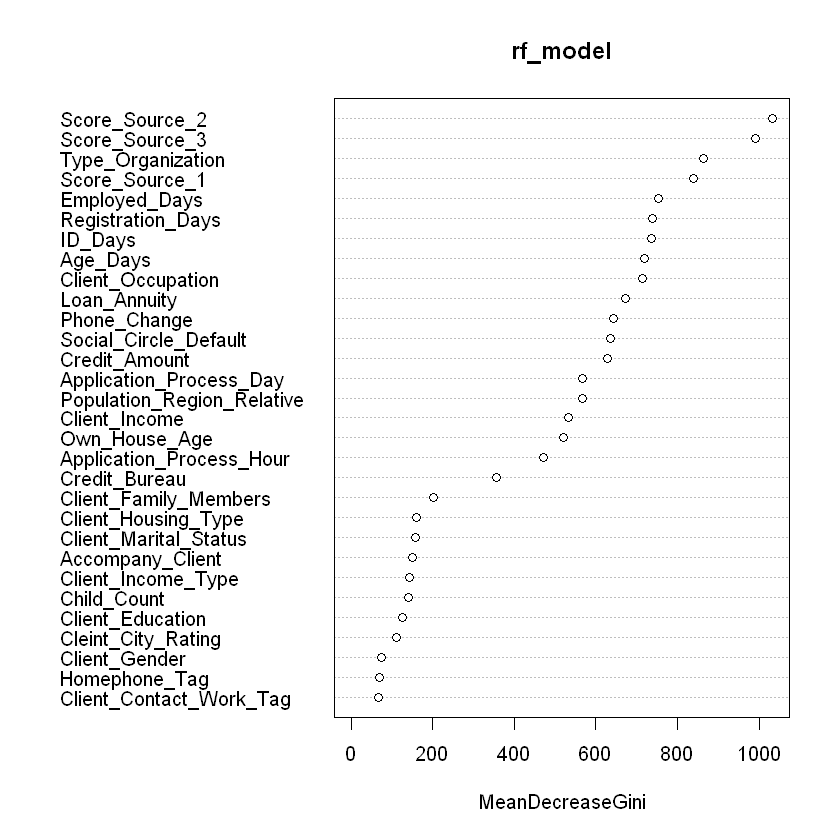

In [66]:
varImpPlot(rf_model, scale = TRUE)

In [67]:
importance(rf_model)


,MeanDecreaseGini
Client_Income,533.20087
Child_Count,140.12433
Credit_Amount,627.73217
Loan_Annuity,672.55639
Accompany_Client,150.80158
Client_Income_Type,143.53886
Client_Education,125.97590
Client_Marital_Status,157.40010
Client_Gender,73.29848
Loan_Contract_Type,33.09503


## 7. Comparison

In [68]:
#Loading Dataset
df <- read.csv('Train_Imputed_norm.csv', stringsAsFactors = T)
df$Default <- factor(df$Default)

In [69]:
# Split dataset to train and test Sets
set.seed(500)
spt <- sample.split(df$Default, SplitRatio = 0.8)
train <- subset(df, spt == T)
test  <- subset(df, spt == F)
rm(spt)

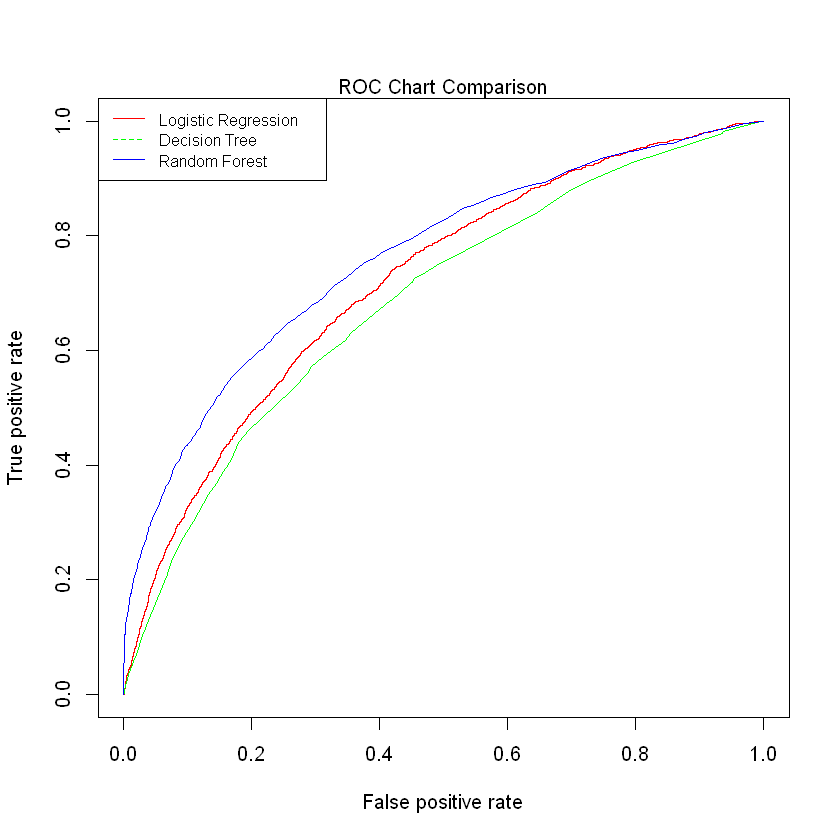

In [70]:
pred <- predict(lr_model, newdata = test, type = 'response')
pred_roc <- prediction(predictions = pred, labels = test$Default)
perf_roc <- performance(pred_roc, 'tpr', 'fpr')
plot(perf_roc, col = 'red')

# Normalize Num. Variables
cols <- num_cols
pre_proc_val <- preProcess(train[,cols], method = c("center", "scale"))

train[,cols] = predict(pre_proc_val, train[,cols])
test[,cols] = predict(pre_proc_val, test[,cols])

# Converting Cat. Variables to Factor
train[cat_cols] <- lapply(train[cat_cols], factor)
test[cat_cols] <- lapply(test[cat_cols], factor)

pred <- predict(t_model, newdata = test, type = 'prob')
pred <- pred[,2]
pred_roc <- prediction(predictions = pred, labels = test$Default)
perf_roc <- performance(pred_roc, 'tpr', 'fpr')
plot(perf_roc, col = 'green', add = T)

pred <- predict(rf_model, newdata = test, type = 'prob')
pred <- pred[,2]
pred_roc <- prediction(predictions = pred, labels = test$Default)
perf_roc <- performance(pred_roc, 'tpr', 'fpr')
plot(perf_roc, col = 'blue', add = T)

legend("topleft", legend = c('Logistic Regression', 'Decision Tree', 'Random Forest'),
       col = c('red', 'green', 'blue'), lty = 1:2, cex=0.8)
mtext(side = 3, text="ROC Chart Comparison")
